## this is stuff that I had already coded for but didnt present

In [ ]:
for group_name in unique_groups:
    group_peaks = [ppm for ppm, grp in identified_groups if grp == group_name]
    print(f"Simulating group: {group_name}, peaks: {group_peaks}")
    if group_peaks:
        if n_spins <= 4:
            I = np.eye(2)
            sz = np.array([[1, 0], [0, -1]]) / 2
            sx = np.array([[0, 1], [1, 0]]) / 2  # Pauli X operator
            Iz_ops = []
            Ix_ops = []
            for i in range(n_spins):
                op_z = 1
                op_x = 1
                for j in range(n_spins):
                    op_z = kron(op_z, sz if i == j else I)
                    op_x = kron(op_x, sx if i == j else I)
                Iz_ops.append(op_z)
                Ix_ops.append(op_x)
            # Ising (J-coupling) Hamiltonian
            H = 0
            for i in range(n_spins):
                for j in range(i + 1, n_spins):
                    J = j_couplings[0] if j_couplings else 7
                    H += 2 * np.pi * J * Iz_ops[i] @ Iz_ops[j]
            # Add transverse field (X) term for dynamics
            Bx = 5  # adjust field strength for more/less mixing
            for i in range(n_spins):
                H += 2 * np.pi * Bx * Ix_ops[i]
            eigvals, eigvecs = np.linalg.eigh(H)
            print_quantum_simulation_results(group_name, H, eigvals, eigvecs)

            # Animation code for each group
            import matplotlib.pyplot as plt
            from matplotlib.animation import FuncAnimation
            from IPython.display import HTML

            psi0 = np.zeros(H.shape[0], dtype=complex)
            psi0[0] = 1.0
            times = np.linspace(0, 1, 200)
            c = np.dot(eigvecs.conj().T, psi0)
            def psi_t(t):
                phase = np.exp(-1j * eigvals * t)
                return np.dot(eigvecs, c * phase)
            fig, ax = plt.subplots(figsize=(8, 4))
            lines = []
            for i in range(H.shape[0]):
                (line,) = ax.plot([], [], label=f'State {i}')
                lines.append(line)
            ax.set_xlim(times[0], times[-1])
            ax.set_ylim(0, 1)
            ax.set_xlabel('Time')
            ax.set_ylabel('Probability')
            ax.set_title(f'Spin System Time Evolution: {group_name}')
            ax.legend()
            def animate(frame):
                t = times[frame]
                psi = psi_t(t)
                for i, line in enumerate(lines):
                    line.set_data(times[:frame+1], [np.abs(psi_t(tt)[i])**2 for tt in times[:frame+1]])
                return lines
            ani = FuncAnimation(fig, animate, frames=len(times), interval=50, blit=True)
            plt.show()
            display(HTML(ani.to_jshtml()))
        

## Displaying all the raw FID from krishna_data

📂 Found 7 ASC files in fid_krishna_data/

  1. 25_10_30_valerenicFrac4_6_13C.asc
  2. 25_10_30_ValerianFrac2_C13_CDCl3.asc
  3. 25_10_30_ValerianFrac2_H1_CDCl3.asc
  4. 25_10_30_valerianFrac4_6.asc
  5. 25_10_30_ValerianFrac4_6_Acetd6_C13.asc
  6. 25_10_30_ValerianFrac4_6_AcetD6H1.asc
  7. 25_11_18_indst_1H.asc

LOADING AND PLOTTING ALL FILES

            X      Real  Imaginary
0  224.969753  0.000310  -0.004928
1  224.960219 -0.001170  -0.004541
2  224.950684 -0.001748  -0.002680
3  224.941150 -0.000508  -0.003089
4  224.931615 -0.000109  -0.003713

📊 25_10_30_valerenicFrac4_6_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -2.070906e-02 to 1.154851e+00
  Imag range: -6.543685e-01 to 6.284795e-01


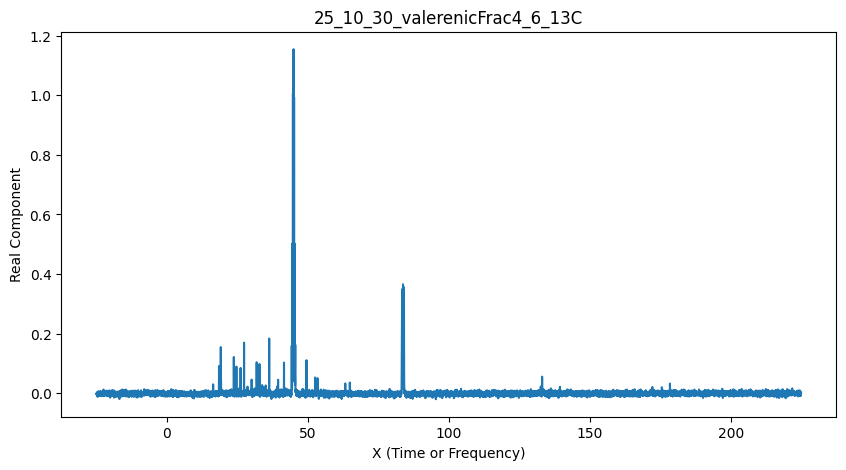

            X      Real  Imaginary
0  224.969753 -0.005799  -0.003868
1  224.960219 -0.005971  -0.002010
2  224.950684 -0.005429  -0.001582
3  224.941150 -0.005117   0.001055
4  224.931615 -0.001178   0.001107

📊 25_10_30_ValerianFrac2_C13_CDCl3
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -1.216020e-02 to 1.133747e+00
  Imag range: -6.507127e-01 to 6.602196e-01


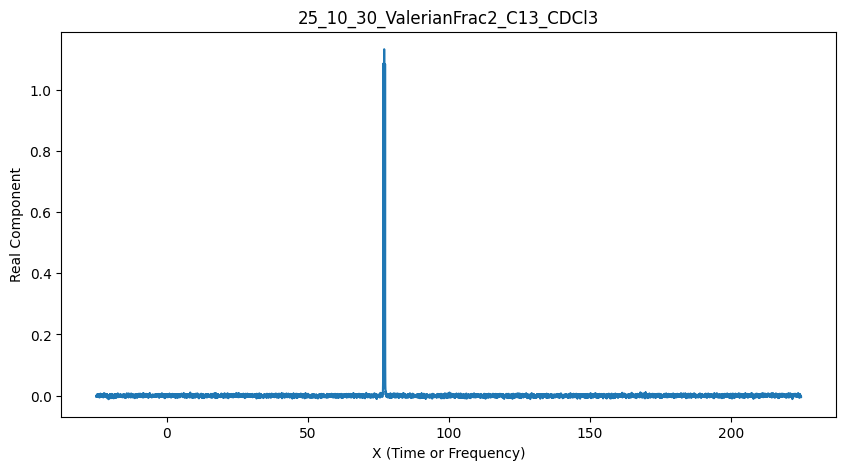

           X      Real  Imaginary
0  12.506402 -0.001844   0.005614
1  12.505256 -0.004747   0.011177
2  12.504111  0.001642   0.009126
3  12.502965 -0.001140   0.013782
4  12.501820 -0.001048   0.011082

📊 25_10_30_ValerianFrac2_H1_CDCl3
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -3.675882e-02 to 9.522243e+00
  Imag range: -5.417559e+00 to 4.426424e+00


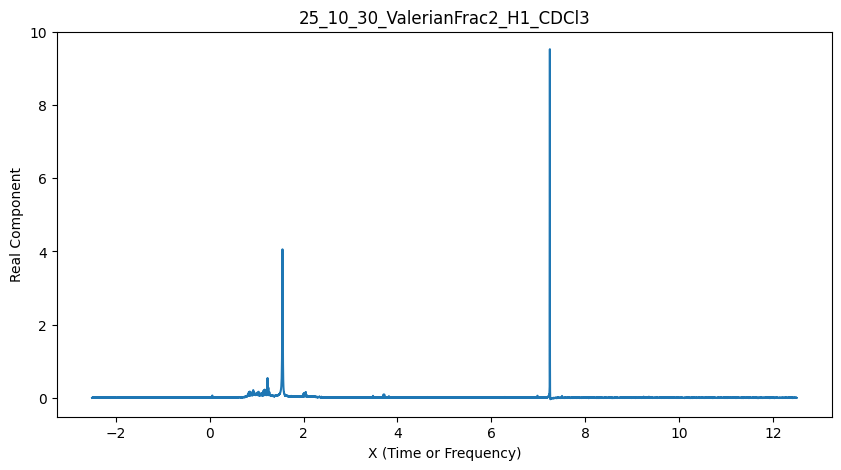

           X      Real  Imaginary
0  12.506402  0.000627  -0.011981
1  12.505256  0.000026  -0.010666
2  12.504111 -0.000042  -0.009897
3  12.502965  0.000212  -0.009041
4  12.501820  0.000067  -0.008397

📊 25_10_30_valerianFrac4_6
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -1.034464e-02 to 2.916555e+00
  Imag range: -1.762263e+00 to 2.381929e+00


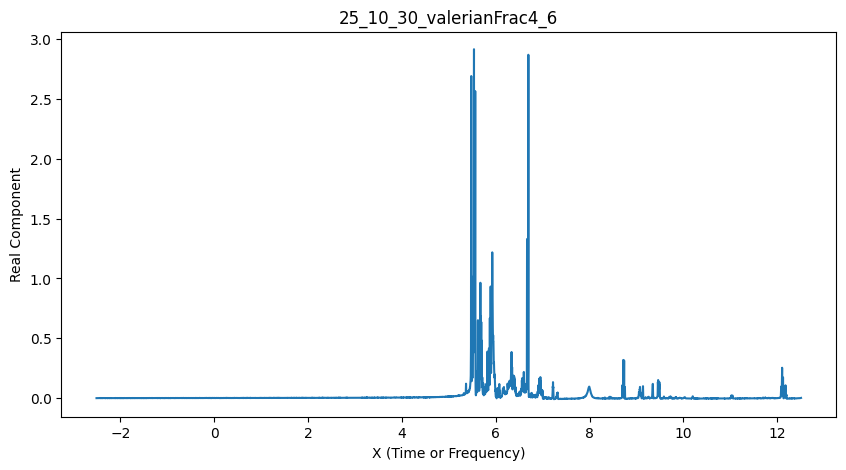

            X      Real  Imaginary
0  224.969753 -0.001953   0.001595
1  224.960219 -0.000574   0.002760
2  224.950684  0.001384   0.002043
3  224.941150  0.002182   0.000213
4  224.931615  0.001435  -0.001401

📊 25_10_30_ValerianFrac4_6_Acetd6_C13
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -1.181334e-02 to 1.118470e+00
  Imag range: -6.346093e-01 to 6.182283e-01


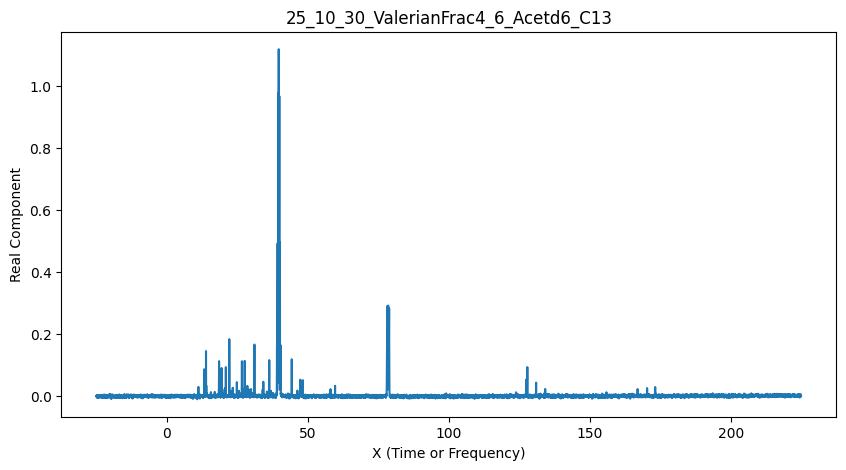

           X      Real  Imaginary
0  12.506402 -0.002584   0.011111
1  12.505256 -0.002734   0.010676
2  12.504111 -0.002653   0.011036
3  12.502965 -0.002825   0.011031
4  12.501820 -0.002736   0.011045

📊 25_10_30_ValerianFrac4_6_AcetD6H1
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -7.672748e-03 to 3.084390e+00
  Imag range: -1.628348e+00 to 2.217218e+00


📊 25_10_30_ValerianFrac4_6_AcetD6H1
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -7.672748e-03 to 3.084390e+00
  Imag range: -1.628348e+00 to 2.217218e+00


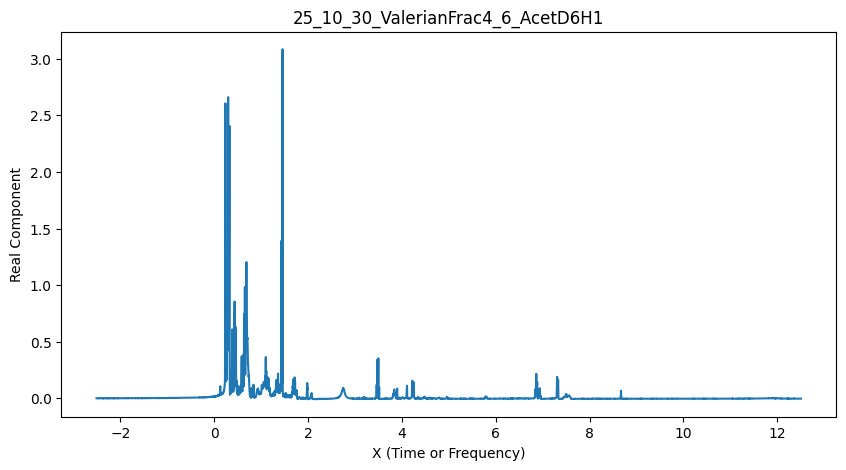

           X      Real  Imaginary
0  12.506402 -0.002396   0.011163
1  12.505256  0.004413   0.011969
2  12.504111  0.001993   0.006890
3  12.502965 -0.000400   0.008223
4  12.501820 -0.001148   0.010689

📊 25_11_18_indst_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -5.660720e-03 to 5.972231e+00
  Imag range: -2.960095e+00 to 3.541831e+00


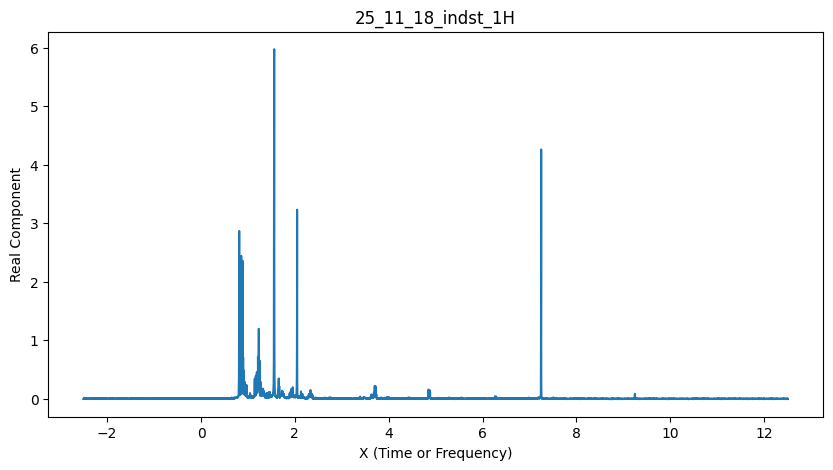


✅ Finished displaying all files!


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from importlib import reload
from functions import nmr_function as nmr

reload(nmr)

# Load ALL files from fid_krishna_data folder
folder = Path("fid_krishna_data")

# List all ASC files
asc_files = sorted([f for f in folder.glob("*.asc")])
print(f"📂 Found {len(asc_files)} ASC files in {folder}/\n")
for i, f in enumerate(asc_files, 1):
    print(f"  {i}. {f.name}")

print("\n" + "="*70)
print("LOADING AND PLOTTING ALL FILES")
print("="*70 + "\n")

# Load and plot each file
for file in asc_files:
    try:
        df, name = nmr.load_fid_and_preview(str(file))
        
        # Convert to numpy
        arr = df if isinstance(df, np.ndarray) else df.to_numpy()
        
        print(f"\n{'='*70}")
        print(f"📊 {name}")
        print(f"{'='*70}")
        print(f"  Shape: {arr.shape}")
        print(f"  Dtype: {arr.dtype}")
        print(f"  X range: {arr[0,0]:.6f} to {arr[-1,0]:.6f}")
        print(f"  Real range: {arr[:,1].min():.6e} to {arr[:,1].max():.6e}")
        print(f"  Imag range: {arr[:,2].min():.6e} to {arr[:,2].max():.6e}")
        
        # Plot
        nmr.plot_fid(
            arr,
            title=name,
            xcol=0,
            ycol=1,
            xlabel="X (Time or Frequency)",
            ylabel="Real Component",
            invert_x=False
        )
        
    except Exception as e:
        print(f"❌ Error with {file.name}: {e}")

print("\n✅ Finished displaying all files!")

📂 Found 26 ASC files in flashdrive_data/

  1. 18_03_30_dextacet_13C.asc
  2. 18_03_30_dextacet_1H.asc
  3. 18_05_11_dextraacet_13C.asc
  4. 18_05_14_Aldol_Unknowns_1H.asc
  5. 18_05_18_dextraacet_13C.asc
  6. 18_05_18_dextraacet_1H.asc
  7. 18_05_24_indst_1H.asc
  8. 18_05_25_Qual_Gen_Unk_K46_13C.asc
  9. 18_05_25_Qual_Gen_Unk_K46_1H.asc
  10. 18_05_31_aldol _1H.asc
  11. 18_05_31_unk K20_13C.asc
  12. 18_05_31_unk K20_1H.asc
  13. 18_09_10_aldol_1H.asc
  14. 18_11_05_bg03_1H.asc
  15. 19_03_18_C24_Chris_13C.asc
  16. 19_03_18_C24_Chris_1H.asc
  17. 19_04_01_alkylation_1H.asc
  18. 19_04_01_indst_1H.asc
  19. 19_04_15_Indstdy_13C.asc
  20. 19_04_15_Indstdy_1H.asc
  21. 19_04_18_bg03_1H_presat.asc
  22. 19_04_22_aldol_13C.asc
  23. 19_04_22_aldol_1H.asc
  24. 19_05_06_indst_13C.asc
  25. 19_05_06_indst_1H.asc
  26. 21_10_27_aldol_unk_1H.asc

LOADING AND PLOTTING ALL FLASHDRIVE FILES

            X      Real  Imaginary
0  190.283452 -0.002086  -0.006530
1  190.276182 -0.004860  -0.00515

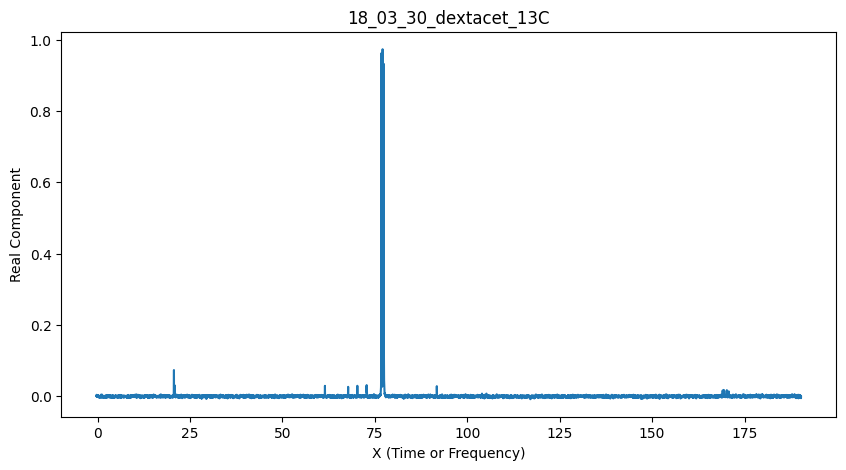

          X      Real  Imaginary
0  7.001026 -0.000009   0.000705
1  7.000492  0.000005   0.000779
2  6.999958  0.000075   0.000754
3  6.999423  0.000055   0.000752
4  6.998889  0.000052   0.000663

📊 18_03_30_dextacet_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 7.001026 to -0.001026
  Real range: -5.812979e-04 to 1.138797e-01
  Imag range: -6.252789e-02 to 5.559092e-02


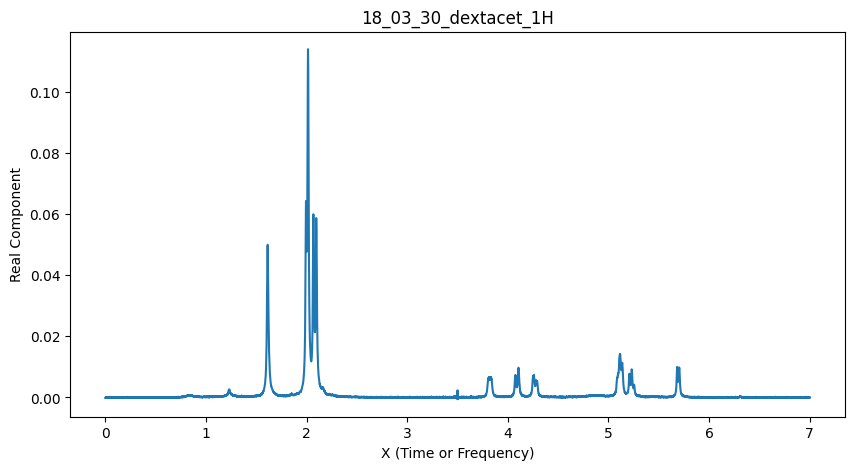

            X      Real  Imaginary
0  180.416210 -0.001136   0.001035
1  180.414677 -0.001046   0.001131
2  180.413145 -0.000939   0.001209
3  180.411612 -0.000821   0.001268
4  180.410079 -0.000697   0.001306

📊 18_05_11_dextraacet_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 180.416210 to 140.241683
  Real range: -4.088627e-03 to 9.292361e-02
  Imag range: -5.651617e-02 to 5.648823e-02


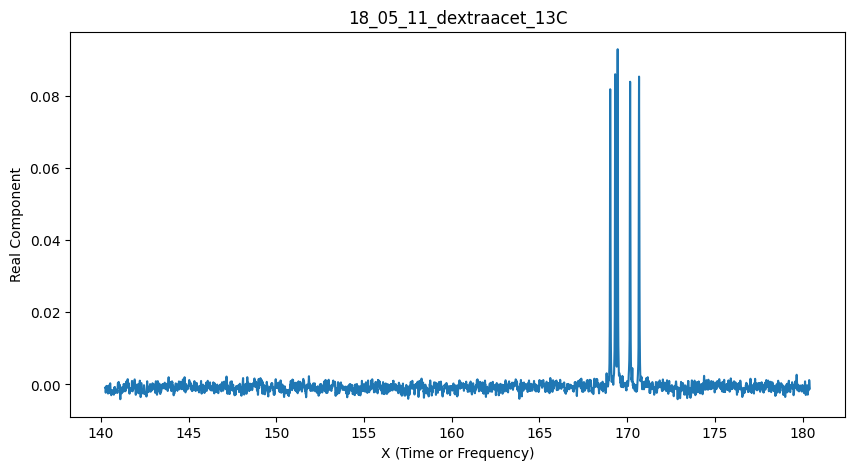

           X      Real  Imaginary
0  12.506402 -0.000246   0.003049
1  12.505256 -0.000241   0.002991
2  12.504111 -0.000562   0.003310
3  12.502965 -0.000202   0.003434
4  12.501820 -0.000138   0.003158

📊 18_05_14_Aldol_Unknowns_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -1.220840e-03 to 7.068205e-01
  Imag range: -4.661210e-01 to 4.456073e-01


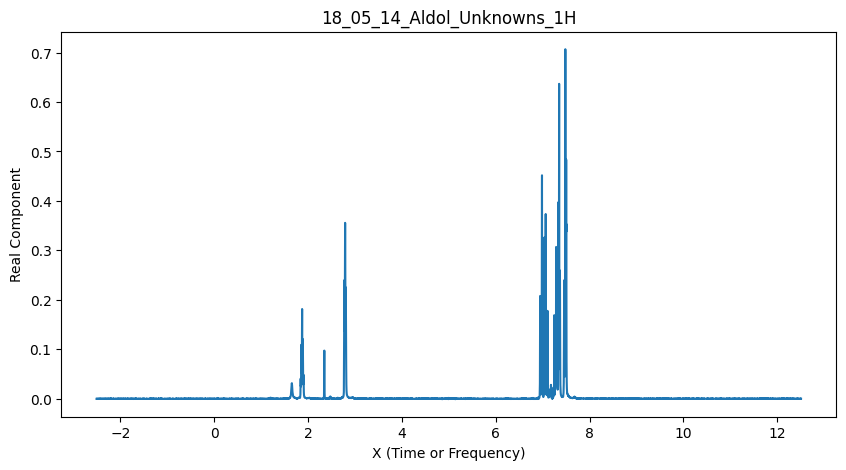

            X      Real  Imaginary
0  224.969753 -0.002115   0.001005
1  224.960219 -0.000964   0.001071
2  224.950684 -0.001077   0.000862
3  224.941150 -0.000418   0.000773
4  224.931615 -0.000822   0.000489

📊 18_05_18_dextraacet_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -1.099947e-02 to 1.210457e+00
  Imag range: -6.898468e-01 to 7.105163e-01


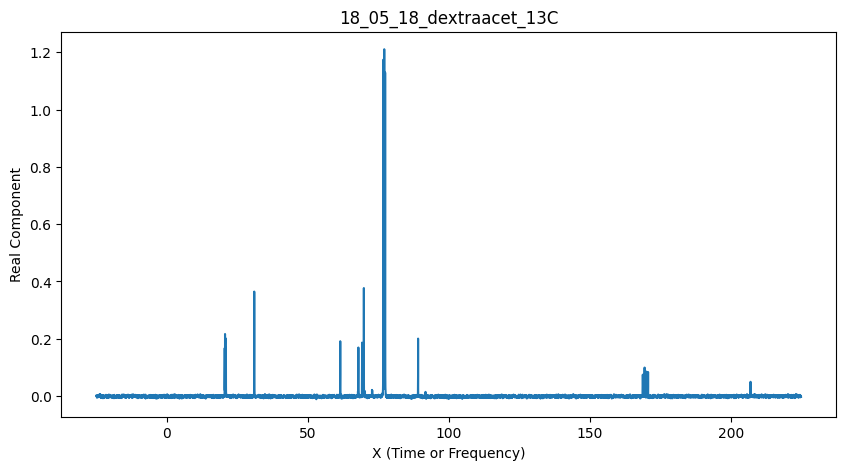

          X      Real  Imaginary
0  7.001026 -0.001096   0.015260
1  7.000492 -0.001251   0.015097
2  6.999958 -0.001174   0.015368
3  6.999423 -0.000892   0.015265
4  6.998889 -0.000965   0.015262

📊 18_05_18_dextraacet_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 7.001026 to -0.001026
  Real range: -1.745313e-03 to 1.625322e+01
  Imag range: -7.554243e+00 to 8.676911e+00


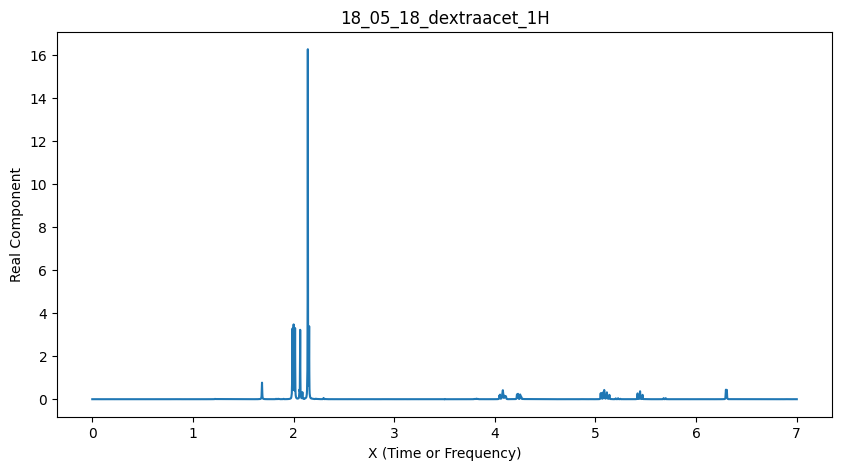

          X      Real  Imaginary
0  0.000000  0.000002   0.000002
1  0.000133 -0.000856  -0.000378
2  0.000267  0.037217   0.037058
3  0.000400  0.018349   0.126772
4  0.000533 -0.147001  -0.087361

📊 18_05_24_indst_1H
  Shape: (16384, 3)
  Dtype: float64
  X range: 0.000000 to 2.183526
  Real range: -1.213668e+02 to 1.259458e+02
  Imag range: -1.118706e+02 to 1.158649e+02


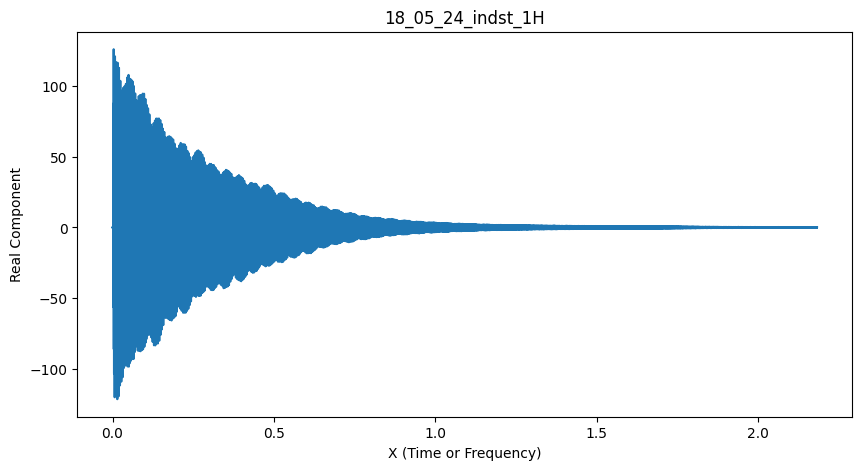

            X      Real  Imaginary
0  224.969753 -0.003849   0.003289
1  224.960219 -0.004698   0.003205
2  224.950684 -0.005902   0.004160
3  224.941150 -0.005098   0.005679
4  224.931615 -0.004004   0.004789

📊 18_05_25_Qual_Gen_Unk_K46_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -2.138125e-02 to 5.188922e+00
  Imag range: -2.822305e+00 to 3.198929e+00


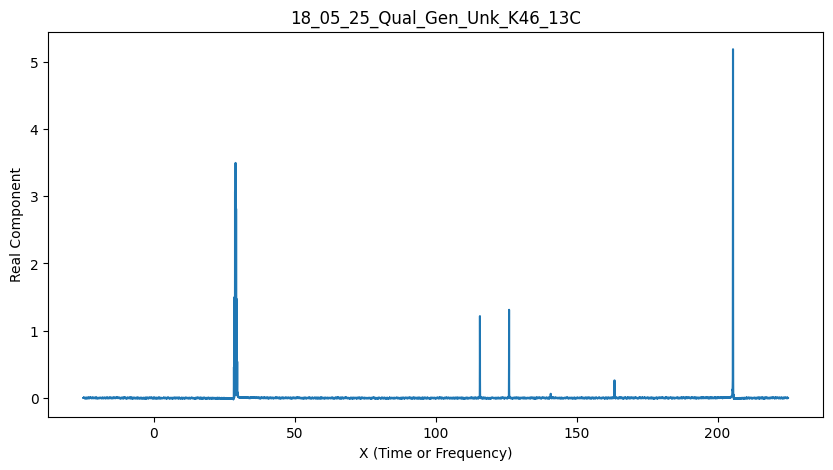

           X      Real  Imaginary
0  12.506402 -0.001522   0.024711
1  12.505256 -0.000970   0.024896
2  12.504111 -0.002690   0.024432
3  12.502965 -0.002924   0.024615
4  12.501820 -0.002992   0.025718

📊 18_05_25_Qual_Gen_Unk_K46_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -7.121864e-03 to 1.461572e+01
  Imag range: -9.854745e+00 to 8.180568e+00


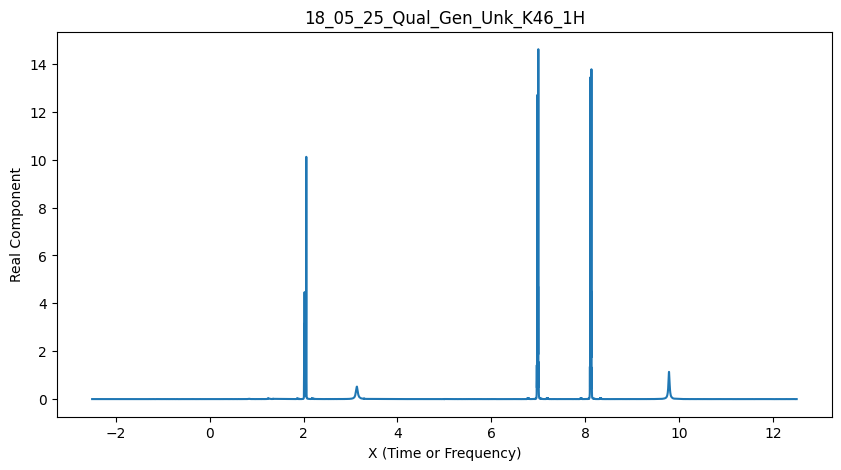

           X      Real  Imaginary
0  12.506402 -0.002494   0.015717
1  12.505256 -0.002406   0.016115
2  12.504111 -0.002335   0.016426
3  12.502965 -0.002051   0.016543
4  12.501820 -0.002266   0.016036

📊 18_05_31_aldol _1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -1.080567e-02 to 2.040275e+01
  Imag range: -1.193165e+01 to 1.221352e+01


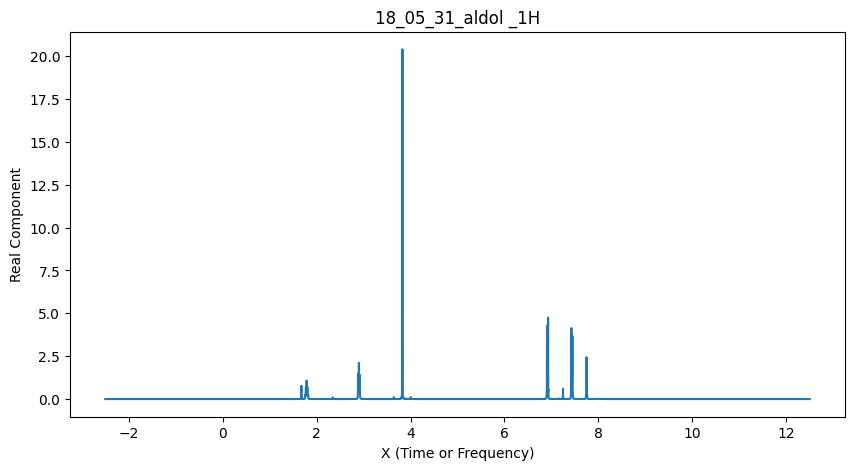

            X      Real  Imaginary
0  224.969753 -0.001053   0.002936
1  224.960219  0.000670  -0.002629
2  224.950684 -0.004947  -0.002841
3  224.941150 -0.004797  -0.000662
4  224.931615 -0.006059   0.001078

📊 18_05_31_unk K20_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -2.050039e-02 to 5.946182e+00
  Imag range: -3.009557e+00 to 2.946553e+00


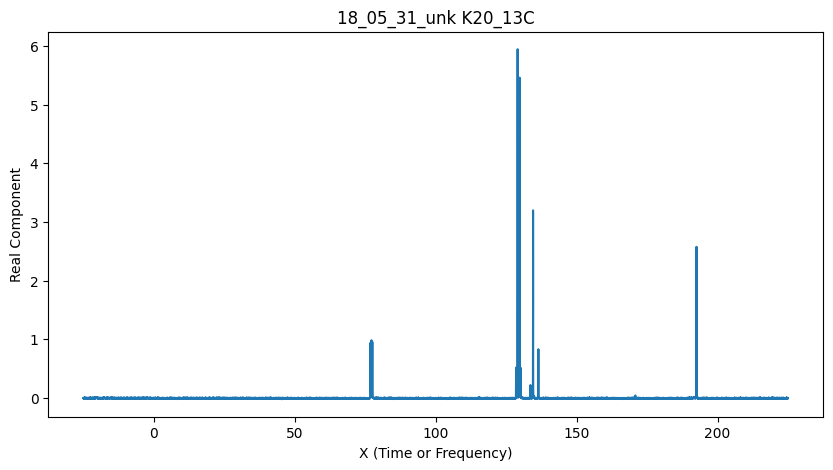

           X      Real  Imaginary
0  12.506402 -0.002254   0.028163
1  12.505256 -0.002237   0.028292
2  12.504111 -0.002255   0.028195
3  12.502965 -0.002349   0.028175
4  12.501820 -0.002260   0.028225

📊 18_05_31_unk K20_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -4.548137e-03 to 4.730355e+00
  Imag range: -3.652038e+00 to 3.427232e+00


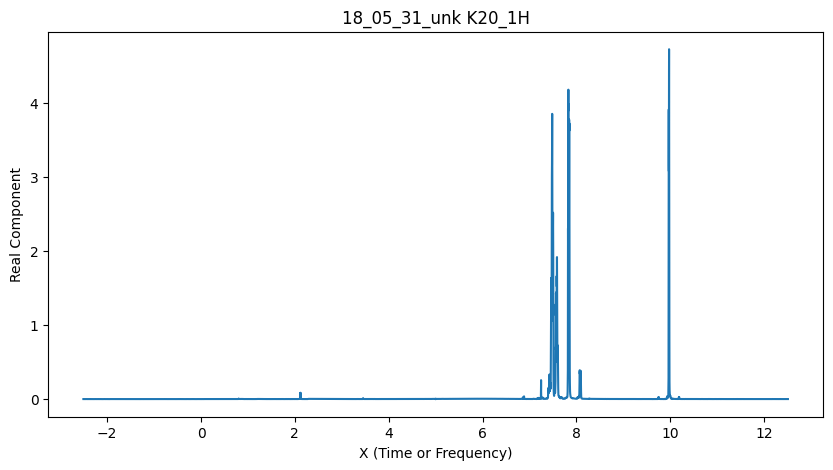

           X      Real  Imaginary
0  12.506402 -0.002413   0.018169
1  12.505256 -0.001813   0.020487
2  12.504111  0.000774   0.018759
3  12.502965 -0.001605   0.017844
4  12.501820 -0.001374   0.020072

📊 18_09_10_aldol_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -4.204187e-03 to 6.094630e+00
  Imag range: -3.663015e+00 to 3.348336e+00


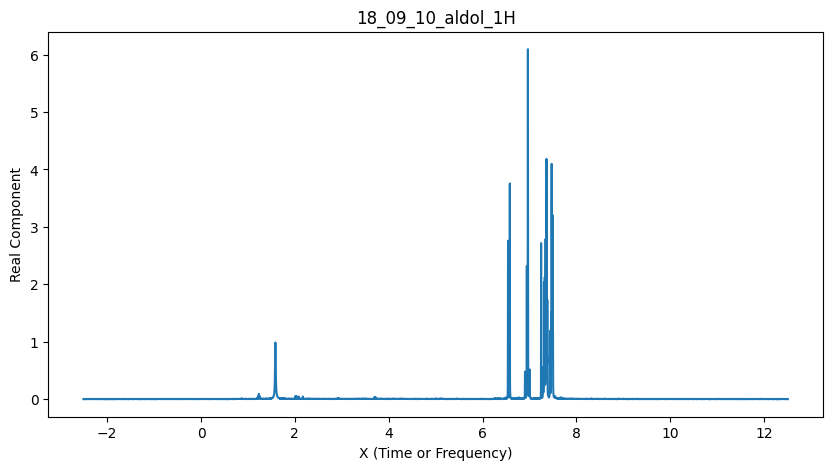

           X      Real  Imaginary
0  10.999413 -0.001381   0.012347
1  10.998574 -0.001498   0.012302
2  10.997734 -0.001526   0.012333
3  10.996895 -0.001534   0.012541
4  10.996056 -0.001603   0.012662

📊 18_11_05_bg03_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 10.999413 to 0.000587
  Real range: -2.878194e-03 to 1.345956e+00
  Imag range: -6.767804e-01 to 6.639021e-01


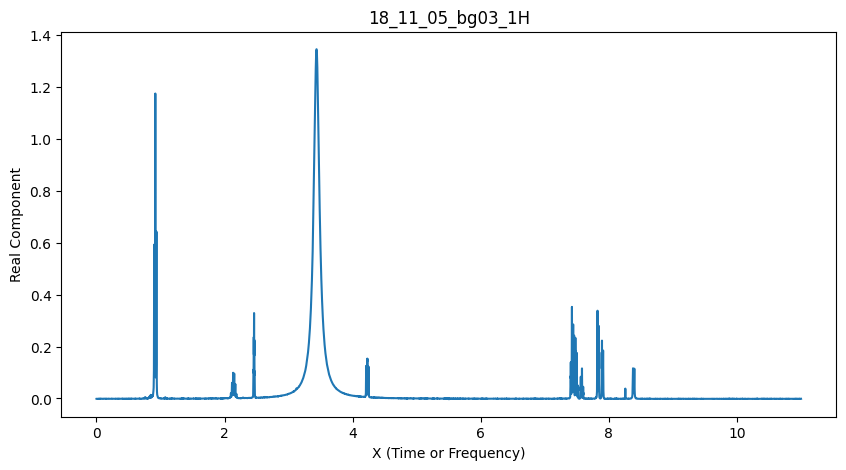

            X      Real  Imaginary
0  224.969753  0.001379  -0.001402
1  224.960219  0.000898  -0.002025
2  224.950684  0.000024  -0.002225
3  224.941150 -0.000460  -0.001519
4  224.931615 -0.001004  -0.001030

📊 19_03_18_C24_Chris_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -1.543392e-02 to 1.312944e+00
  Imag range: -7.462187e-01 to 7.653916e-01


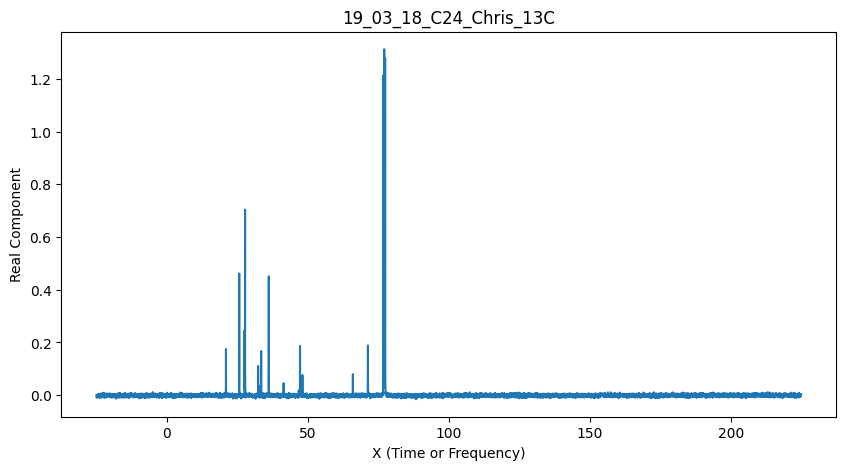

           X      Real  Imaginary
0  12.506402 -0.002723   0.010970
1  12.505256 -0.002071   0.010500
2  12.504111 -0.001402   0.010697
3  12.502965 -0.002271   0.009843
4  12.501820 -0.002514   0.010292

📊 19_03_18_C24_Chris_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -4.442083e-03 to 3.603501e+01
  Imag range: -2.235905e+01 to 1.690482e+01


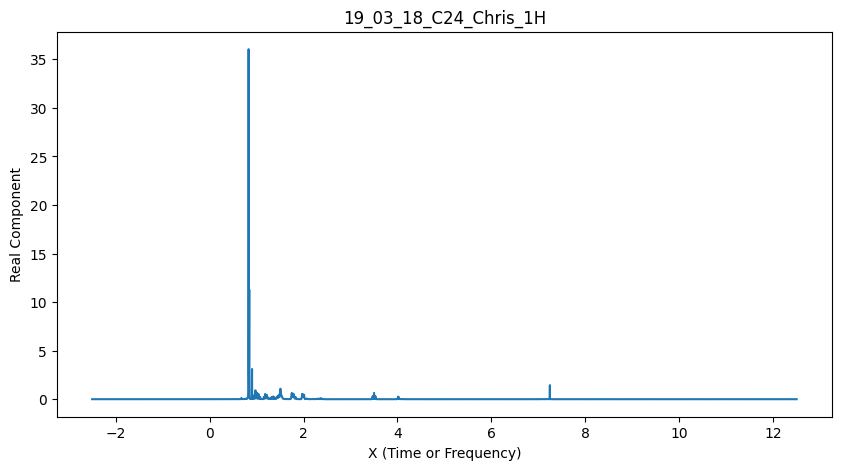

          X      Real  Imaginary
0  0.000000 -0.000005  -0.000013
1  0.000133  0.002491   0.003996
2  0.000267 -0.048682  -0.255328
3  0.000400  0.284746  -0.564517
4  0.000533  0.359978   0.758363

📊 19_04_01_alkylation_1H
  Shape: (16384, 3)
  Dtype: float64
  X range: 0.000000 to 2.183526
  Real range: -5.878710e+02 to 5.432858e+02
  Imag range: -5.573812e+02 to 5.597666e+02


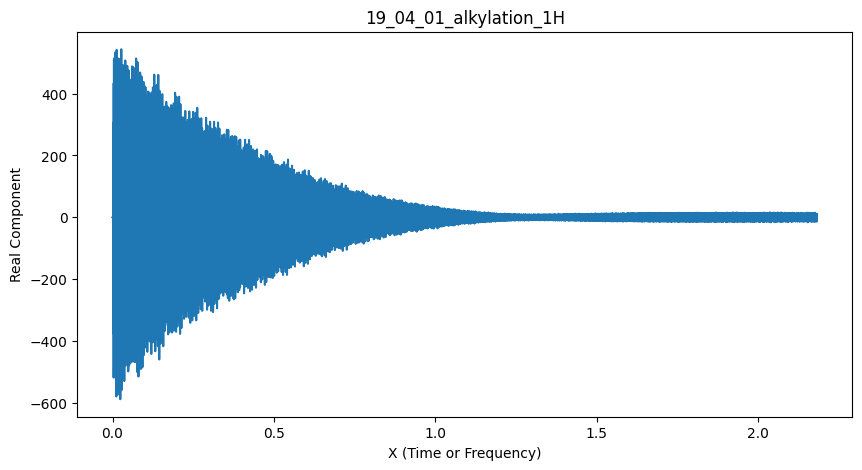

          X      Real  Imaginary
0  9.001679 -0.001349   0.010539
1  9.000992 -0.001448   0.010776
2  9.000305 -0.001326   0.010725
3  8.999618 -0.001364   0.010614
4  8.998931 -0.001453   0.010734

📊 19_04_01_indst_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 9.001679 to -0.001679
  Real range: -6.547974e-03 to 4.514601e+01
  Imag range: -2.460291e+01 to 2.416134e+01


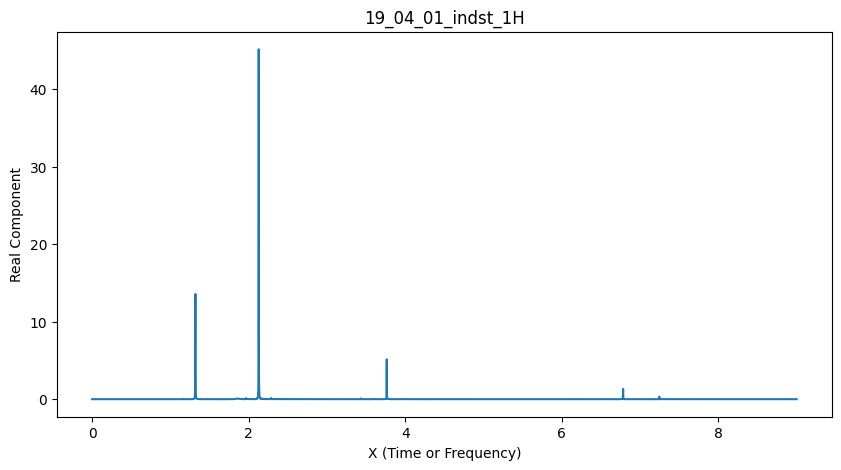

            X      Real  Imaginary
0  224.969753 -0.009760   0.000412
1  224.960219 -0.012036   0.002251
2  224.950684 -0.011290   0.008389
3  224.941150 -0.004884   0.013275
4  224.931615  0.004787   0.013138

📊 19_04_15_Indstdy_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -3.406543e-02 to 2.433785e+00
  Imag range: -1.201673e+00 to 1.231978e+00


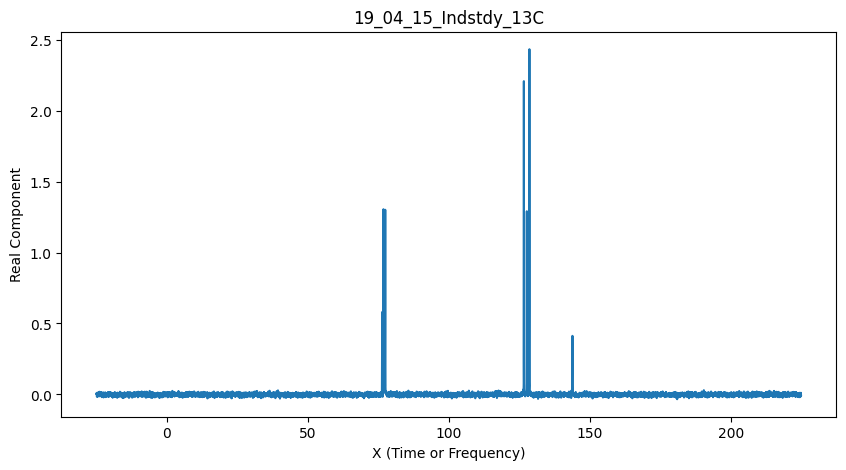

           X      Real  Imaginary
0  12.506402 -0.000209   0.002525
1  12.505256 -0.000433   0.002731
2  12.504111 -0.000313   0.002802
3  12.502965 -0.000170   0.002909
4  12.501820 -0.000258   0.002650

📊 19_04_15_Indstdy_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -2.170772e-03 to 1.236623e+00
  Imag range: -7.381191e-01 to 7.277053e-01


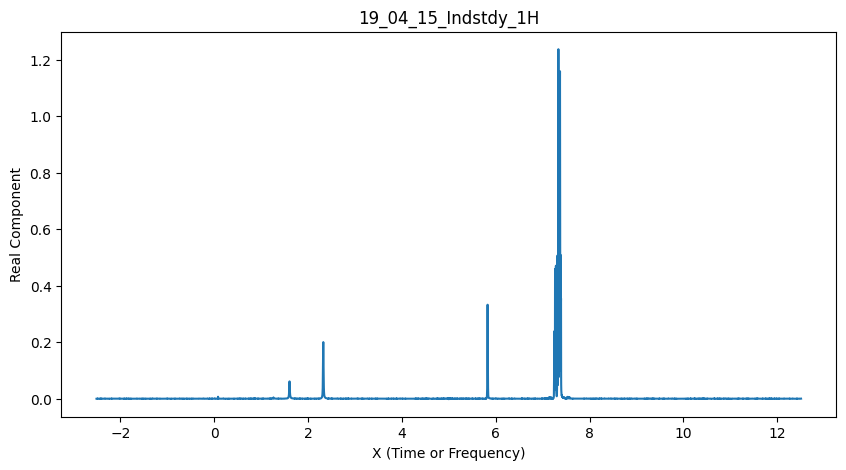

           X      Real  Imaginary
0  13.506402 -0.001545   0.011263
1  13.505256 -0.002086   0.011561
2  13.504111 -0.002054   0.011303
3  13.502965 -0.002039   0.011649
4  13.501820 -0.002383   0.011617

📊 19_04_18_bg03_1H_presat
  Shape: (13107, 3)
  Dtype: float64
  X range: 13.506402 to -1.506402
  Real range: -1.290991e-02 to 5.716997e+00
  Imag range: -2.851165e+00 to 2.408780e+00


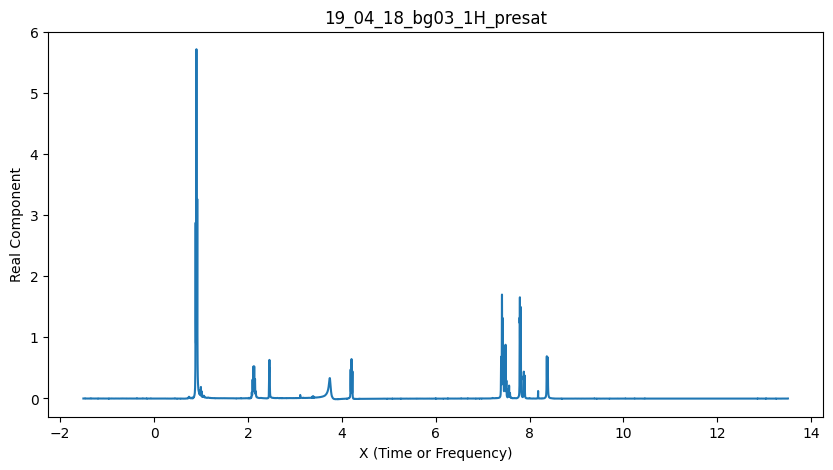

            X      Real  Imaginary
0  212.529326  0.002082  -0.006006
1  212.520740  0.000020  -0.007809
2  212.512155 -0.001235  -0.006643
3  212.503569 -0.002777  -0.008559
4  212.494984 -0.007715  -0.005843

📊 19_04_22_aldol_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 212.529326 to -12.520740
  Real range: -1.922235e-02 to 1.228998e+00
  Imag range: -7.357974e-01 to 6.964499e-01


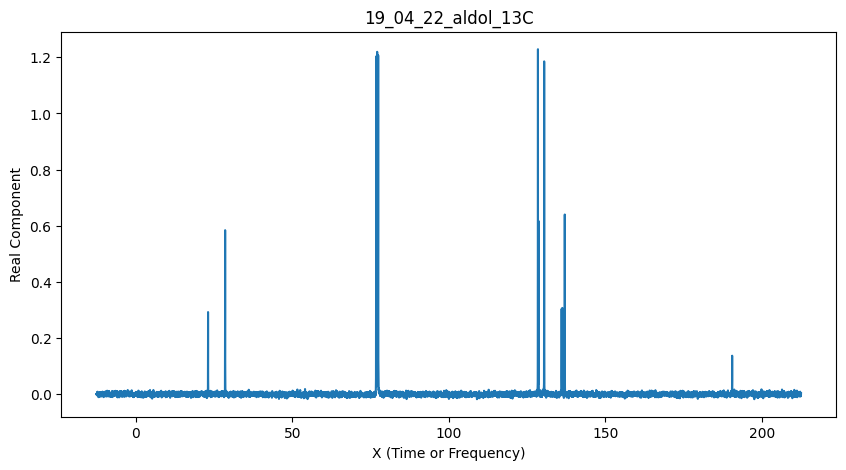

           X      Real  Imaginary
0  10.100190 -0.000690   0.022632
1  10.099411 -0.000797   0.021982
2  10.098633 -0.000908   0.022059
3  10.097855 -0.001014   0.021905
4  10.097076 -0.001094   0.021990

📊 19_04_22_aldol_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 10.100190 to -0.100190
  Real range: -4.320876e-03 to 3.509985e+00
  Imag range: -1.955593e+00 to 1.818055e+00


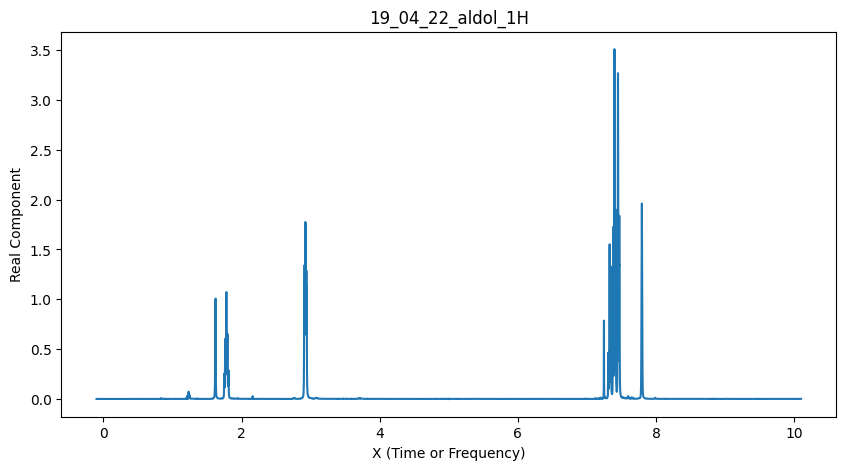

            X      Real  Imaginary
0  224.969753 -0.003858  -0.005775
1  224.960219  0.003163  -0.003049
2  224.950684  0.002019  -0.010783
3  224.941150 -0.003424  -0.010000
4  224.931615 -0.005718  -0.006779

📊 19_05_06_indst_13C
  Shape: (26214, 3)
  Dtype: float64
  X range: 224.969753 to -24.960219
  Real range: -2.515319e-02 to 1.333967e+00
  Imag range: -7.871232e-01 to 7.669390e-01


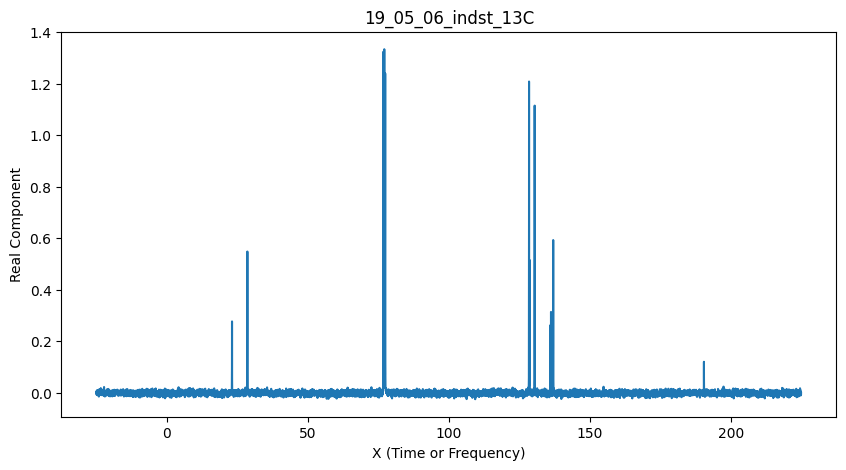

           X      Real  Imaginary
0  12.506402 -0.002439   0.020425
1  12.505256 -0.001876   0.020096
2  12.504111 -0.002249   0.020250
3  12.502965 -0.002204   0.019499
4  12.501820 -0.002198   0.019785

📊 19_05_06_indst_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -3.885937e-03 to 5.591089e+00
  Imag range: -3.104176e+00 to 2.895304e+00


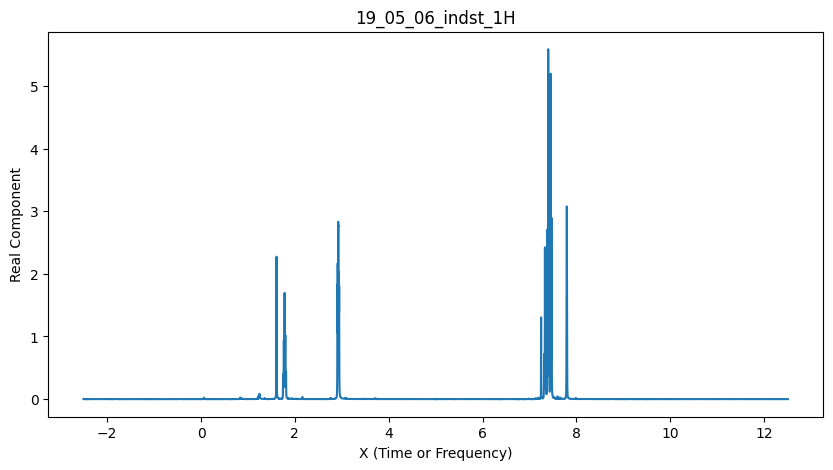

           X      Real  Imaginary
0  12.506402 -0.000994   0.016770
1  12.505256 -0.001926   0.016973
2  12.504111 -0.001129   0.017060
3  12.502965 -0.001758   0.016596
4  12.501820 -0.001293   0.017204

📊 21_10_27_aldol_unk_1H
  Shape: (13107, 3)
  Dtype: float64
  X range: 12.506402 to -2.506402
  Real range: -4.286822e-03 to 4.620373e+00
  Imag range: -2.672904e+00 to 2.492997e+00


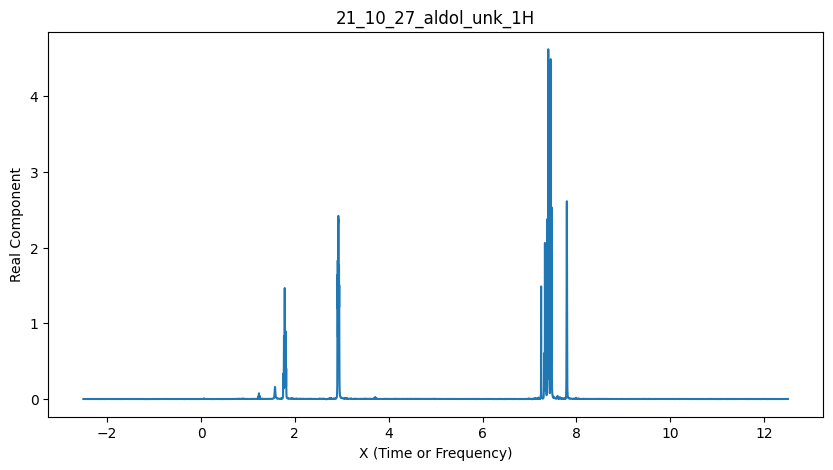


✅ Finished displaying all flashdrive files!


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from importlib import reload
from functions import nmr_function as nmr

reload(nmr)

# Load ALL files from flashdrive_data folder
folder = Path("flashdrive_data")

# List all ASC files
asc_files = sorted([f for f in folder.glob("*.asc")])
print(f"📂 Found {len(asc_files)} ASC files in {folder}/\n")
for i, f in enumerate(asc_files, 1):
    print(f"  {i}. {f.name}")

print("\n" + "="*70)
print("LOADING AND PLOTTING ALL FLASHDRIVE FILES")
print("="*70 + "\n")

# Load and plot each file
for file in asc_files:
    try:
        df, name = nmr.load_fid_and_preview(str(file))
        
        # Convert to numpy
        arr = df if isinstance(df, np.ndarray) else df.to_numpy()
        
        print(f"\n{'='*70}")
        print(f"📊 {name}")
        print(f"{'='*70}")
        print(f"  Shape: {arr.shape}")
        print(f"  Dtype: {arr.dtype}")
        print(f"  X range: {arr[0,0]:.6f} to {arr[-1,0]:.6f}")
        print(f"  Real range: {arr[:,1].min():.6e} to {arr[:,1].max():.6e}")
        print(f"  Imag range: {arr[:,2].min():.6e} to {arr[:,2].max():.6e}")
        
        # Plot
        nmr.plot_fid(
            arr,
            title=name,
            xcol=0,
            ycol=1,
            xlabel="X (Time or Frequency)",
            ylabel="Real Component",
            invert_x=False
        )
        
    except Exception as e:
        print(f"❌ Error with {file.name}: {e}")

print("\n✅ Finished displaying all flashdrive files!")

Found ASC files: 28
 - 13_03_11_indst_1H%20fid.asc
 - 13_03_11_indst_1H.asc
 - training_data_1.asc
 - training_data_10.asc
 - training_data_11.asc
 - training_data_12.asc
 - training_data_13.asc
 - training_data_14.asc
 - training_data_15.asc
 - training_data_16.asc
 - training_data_17.asc
 - training_data_18.asc
 - training_data_19.asc
 - training_data_2.asc
 - training_data_20.asc
 - training_data_21.asc
 - training_data_22.asc
 - training_data_23.asc
 - training_data_24.asc
 - training_data_25.asc
 - training_data_26.asc
 - training_data_3.asc
 - training_data_4.asc
 - training_data_5.asc
 - training_data_6.asc
 - training_data_7.asc
 - training_data_8.asc
 - training_data_9.asc
          X      Real  Imaginary
0  0.000000  0.000003   0.000009
1  0.000133 -0.001235  -0.003140
2  0.000267  0.050601   0.188029
3  0.000400  0.019175   0.365893
4  0.000533 -0.136525  -0.611649

Loaded 13_03_11_indst_1H%20fid.asc
  Shape: (16384, 3)
  Dtype: float64
  First 5 rows:
 [[ 0.00000000e+00  3.

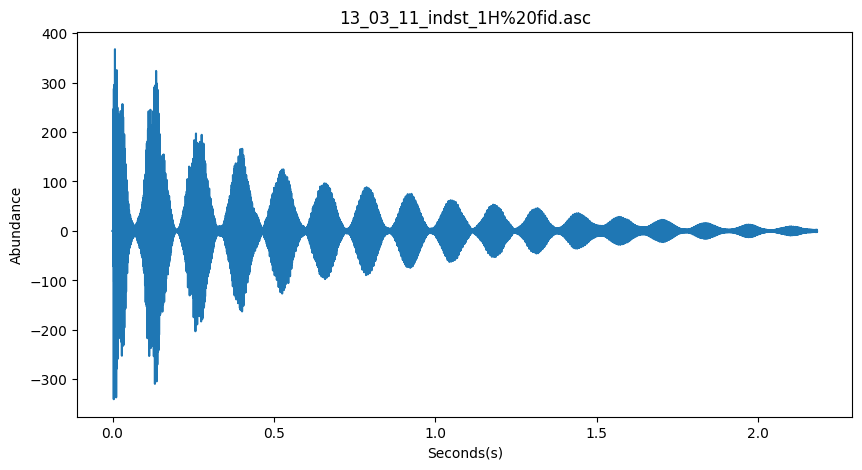

           X      Real  Imaginary
0  12.506402  0.000286   0.000346
1  12.505256  0.000158   0.000110
2  12.504111  0.000039   0.000090
3  12.502965  0.000144   0.000167
4  12.501820  0.000088   0.000139

Loaded 13_03_11_indst_1H.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[1.25064015e+01 2.86220023e-04 3.45740614e-04]
 [1.25052561e+01 1.58187615e-04 1.10435636e-04]
 [1.25041106e+01 3.87996567e-05 8.96531680e-05]
 [1.25029651e+01 1.43590200e-04 1.67252275e-04]
 [1.25018196e+01 8.82392226e-05 1.39351135e-04]]
  Min/Max: -2.50640154627999 12.50640154627999


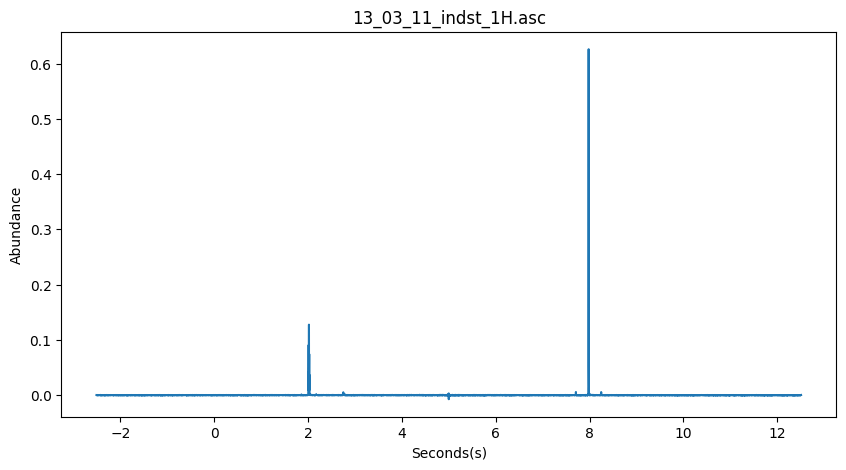

           X      Real  Imaginary
0  12.506402  0.000286   0.000346
1  12.505256  0.000158   0.000110
2  12.504111  0.000039   0.000090
3  12.502965  0.000144   0.000167
4  12.501820  0.000088   0.000139

Loaded training_data_1.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[1.25064015e+01 2.86220023e-04 3.45740614e-04]
 [1.25052561e+01 1.58187615e-04 1.10435636e-04]
 [1.25041106e+01 3.87996567e-05 8.96531680e-05]
 [1.25029651e+01 1.43590200e-04 1.67252275e-04]
 [1.25018196e+01 8.82392226e-05 1.39351135e-04]]
  Min/Max: -2.50640154627999 12.50640154627999


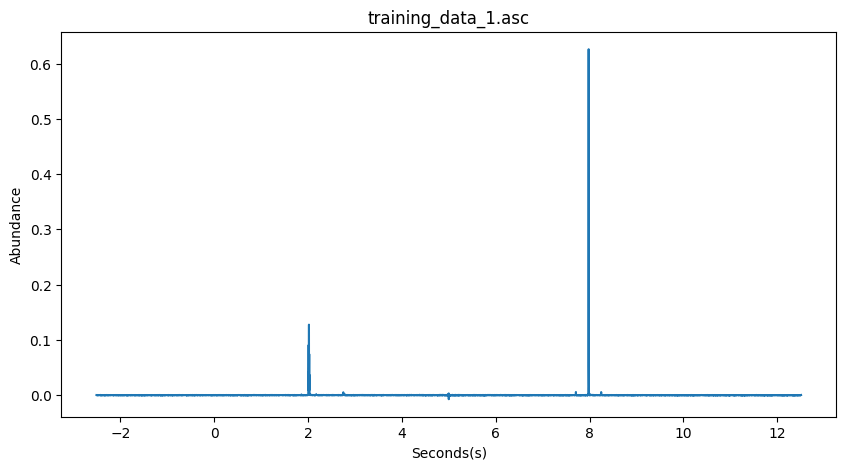

            X      Real  Imaginary
0  224.969753  0.000284  -0.000214
1  224.960219  0.000557  -0.000380
2  224.950684  0.000097  -0.001026
3  224.941150 -0.000352  -0.000562
4  224.931615 -0.000468  -0.000448

Loaded training_data_10.asc
  Shape: (26214, 3)
  Dtype: float64
  First 5 rows:
 [[ 2.24969753e+02  2.84491559e-04 -2.14243777e-04]
 [ 2.24960219e+02  5.56894772e-04 -3.79765156e-04]
 [ 2.24950684e+02  9.67450407e-05 -1.02638500e-03]
 [ 2.24941150e+02 -3.52154774e-04 -5.61619230e-04]
 [ 2.24931615e+02 -4.67922016e-04 -4.48436685e-04]]
  Min/Max: -24.96021891860832 224.96975349963364


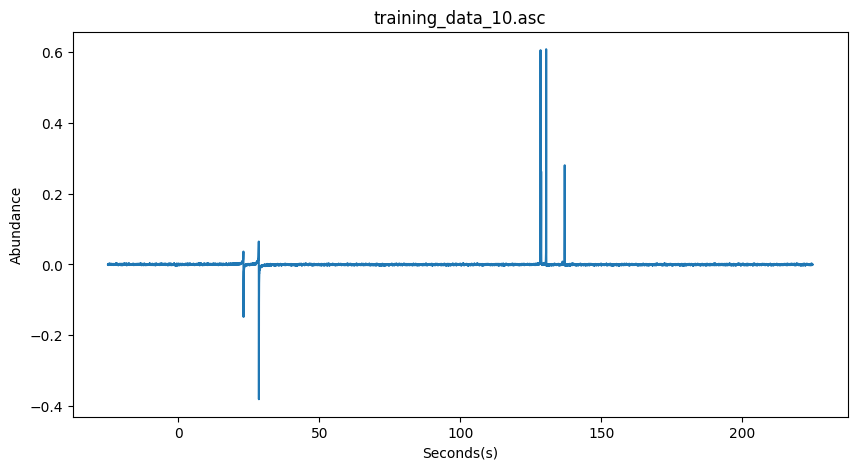

            X      Real  Imaginary
0  224.969753 -0.004236  -0.002237
1  224.960219 -0.005024  -0.001675
2  224.950684 -0.006394  -0.000751
3  224.941150 -0.006069   0.001660
4  224.931615 -0.004335   0.003911

Loaded training_data_11.asc
  Shape: (26214, 3)
  Dtype: float64
  First 5 rows:
 [[ 2.24969753e+02 -4.23572041e-03 -2.23747554e-03]
 [ 2.24960219e+02 -5.02374266e-03 -1.67528989e-03]
 [ 2.24950684e+02 -6.39398601e-03 -7.50688589e-04]
 [ 2.24941150e+02 -6.06916563e-03  1.66004192e-03]
 [ 2.24931615e+02 -4.33547636e-03  3.91107519e-03]]
  Min/Max: -24.96021891860832 224.96975349963364


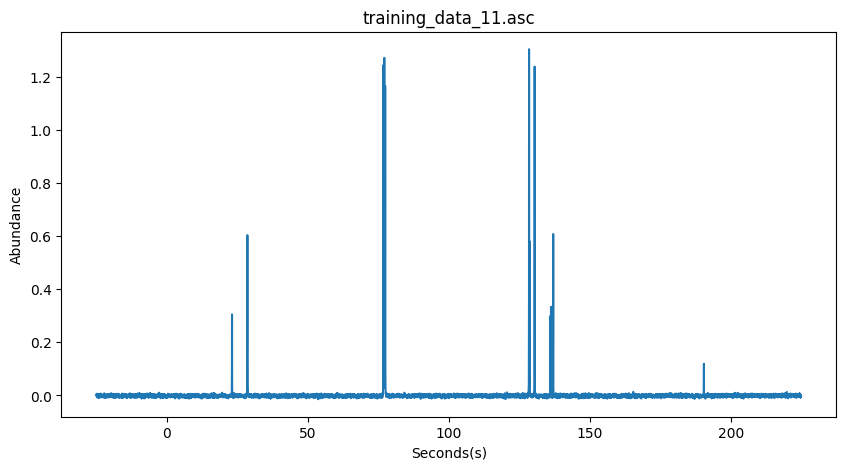

          X      Real  Imaginary
0  0.000000  0.000001   0.000013
1  0.000133 -0.001206  -0.004204
2  0.000267 -0.015305   0.264425
3  0.000400 -0.393098   0.597293
4  0.000533 -0.390635  -0.655285

Loaded training_data_12.asc
  Shape: (16384, 3)
  Dtype: float64
  First 5 rows:
 [[ 0.00000000e+00  1.07051826e-06  1.31316907e-05]
 [ 1.33280000e-04 -1.20588924e-03 -4.20432914e-03]
 [ 2.66560000e-04 -1.53049730e-02  2.64425105e-01]
 [ 3.99840000e-04 -3.93097911e-01  5.97292858e-01]
 [ 5.33120000e-04 -3.90634900e-01 -6.55284524e-01]]
  Min/Max: -528.3924195737151 616.4238686640476


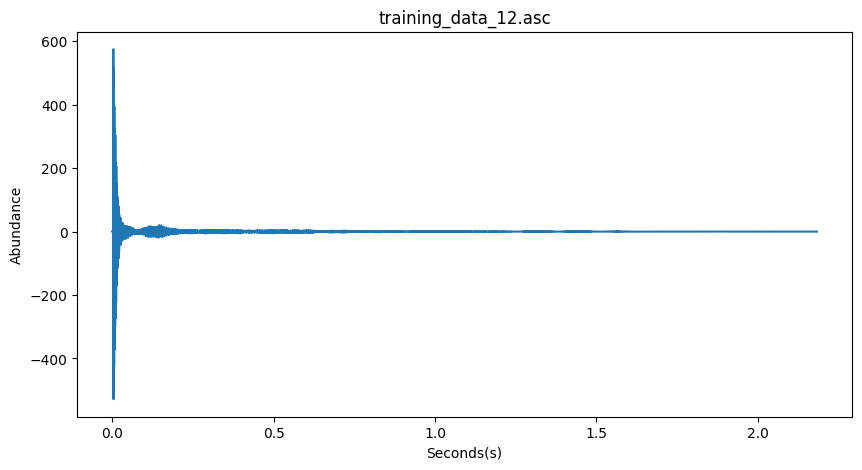

           X      Real  Imaginary
0  13.506402 -0.000243   0.001766
1  13.505256 -0.000481   0.002047
2  13.504111 -0.000078   0.002102
3  13.502965 -0.000186   0.001828
4  13.501820 -0.000299   0.002018

Loaded training_data_13.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -2.43224226e-04  1.76641508e-03]
 [ 1.35052561e+01 -4.80650568e-04  2.04709829e-03]
 [ 1.35041106e+01 -7.84026312e-05  2.10236275e-03]
 [ 1.35029651e+01 -1.85651002e-04  1.82819172e-03]
 [ 1.35018196e+01 -2.98604143e-04  2.01777716e-03]]
  Min/Max: -1.50640154627999 13.50640154627999


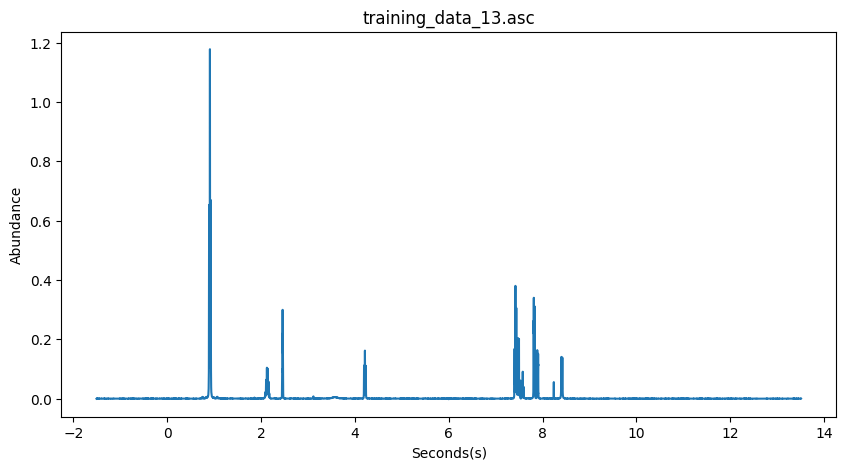

           X      Real  Imaginary
0  13.506402 -0.000114   0.000968
1  13.505256 -0.000138   0.000911
2  13.504111 -0.000292   0.000763
3  13.502965 -0.000159   0.000971
4  13.501820 -0.000243   0.000703

Loaded training_data_14.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -1.14338581e-04  9.67601513e-04]
 [ 1.35052561e+01 -1.38011643e-04  9.11246678e-04]
 [ 1.35041106e+01 -2.92387438e-04  7.63493429e-04]
 [ 1.35029651e+01 -1.59431285e-04  9.71338658e-04]
 [ 1.35018196e+01 -2.42815840e-04  7.03369067e-04]]
  Min/Max: -1.50640154627999 13.50640154627999


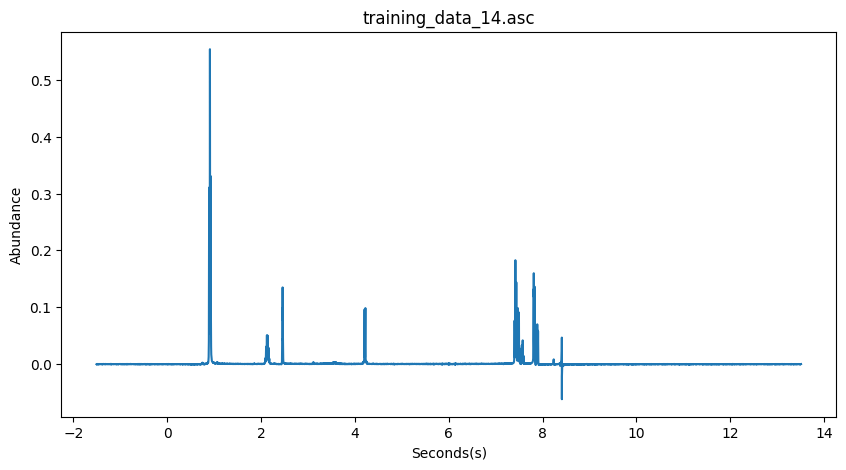

           X      Real  Imaginary
0  13.506402 -0.004973   0.013494
1  13.505256 -0.005498   0.017505
2  13.504111  0.005826   0.016193
3  13.502965 -0.007187   0.008859
4  13.501820 -0.008230   0.012692

Loaded training_data_15.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -4.97314033e-03  1.34944003e-02]
 [ 1.35052561e+01 -5.49795896e-03  1.75046067e-02]
 [ 1.35041106e+01  5.82635743e-03  1.61932474e-02]
 [ 1.35029651e+01 -7.18743867e-03  8.85865329e-03]
 [ 1.35018196e+01 -8.23001689e-03  1.26922511e-02]]
  Min/Max: -4.4109016334356 13.50640154627999


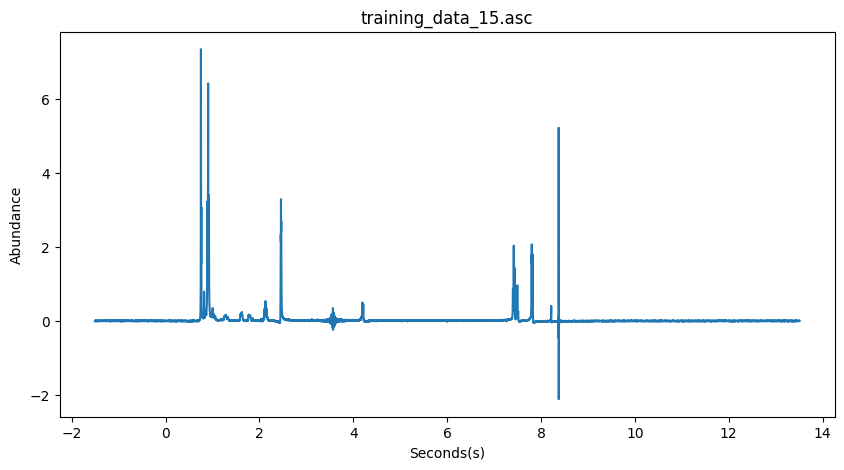

           X      Real  Imaginary
0  13.506402 -0.006567   0.018443
1  13.505256  0.003332   0.018743
2  13.504111 -0.005971   0.019041
3  13.502965 -0.004012   0.007221
4  13.501820  0.001896   0.018229

Loaded training_data_16.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -6.56669843e-03  1.84430110e-02]
 [ 1.35052561e+01  3.33196164e-03  1.87428206e-02]
 [ 1.35041106e+01 -5.97137713e-03  1.90410397e-02]
 [ 1.35029651e+01 -4.01176828e-03  7.22074636e-03]
 [ 1.35018196e+01  1.89611520e-03  1.82286399e-02]]
  Min/Max: -4.39053569261146 13.50640154627999


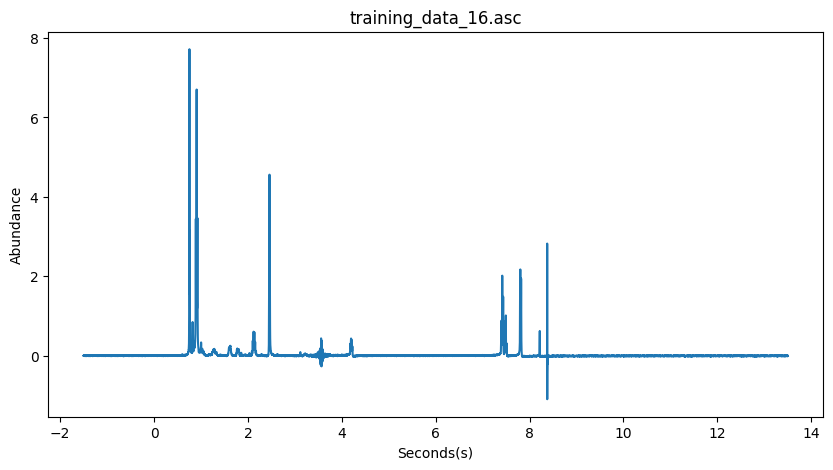

           X      Real  Imaginary
0  13.506402 -0.005492   0.016213
1  13.505256  0.003520   0.026360
2  13.504111 -0.009058   0.013858
3  13.502965 -0.006314   0.019217
4  13.501820 -0.005302   0.019598

Loaded training_data_17.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -5.49241000e-03  1.62125306e-02]
 [ 1.35052561e+01  3.52008978e-03  2.63604132e-02]
 [ 1.35041106e+01 -9.05750124e-03  1.38579035e-02]
 [ 1.35029651e+01 -6.31407785e-03  1.92167224e-02]
 [ 1.35018196e+01 -5.30245647e-03  1.95977364e-02]]
  Min/Max: -4.58350970447012 13.50640154627999


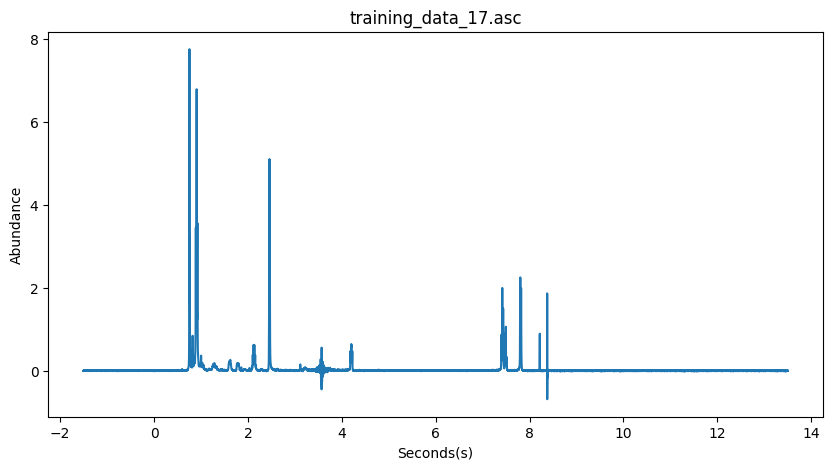

           X      Real  Imaginary
0  13.506402 -0.002171   0.011286
1  13.505256 -0.002539   0.011433
2  13.504111 -0.002888   0.011754
3  13.502965 -0.002201   0.011935
4  13.501820 -0.002995   0.011968

Loaded training_data_18.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -2.17102698e-03  1.12859601e-02]
 [ 1.35052561e+01 -2.53914489e-03  1.14328659e-02]
 [ 1.35041106e+01 -2.88770881e-03  1.17539362e-02]
 [ 1.35029651e+01 -2.20097607e-03  1.19351234e-02]
 [ 1.35018196e+01 -2.99490495e-03  1.19684966e-02]]
  Min/Max: -2.5981676496611 13.50640154627999


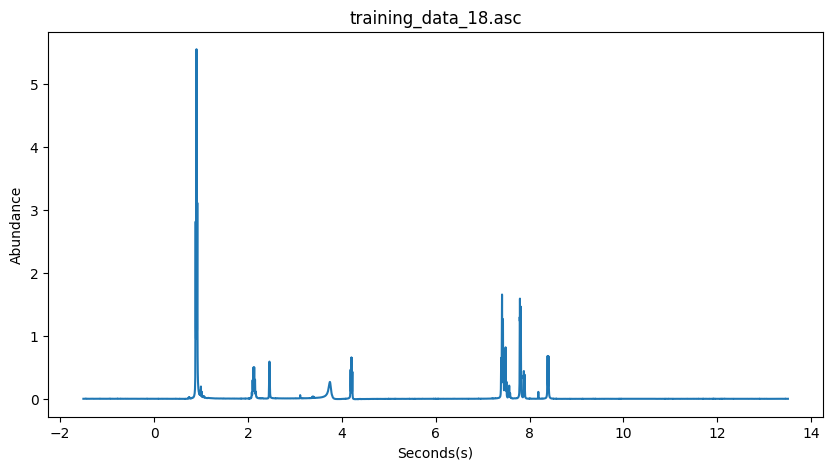

           X      Real  Imaginary
0  13.506402 -0.004077   0.016804
1  13.505256 -0.001352   0.009727
2  13.504111 -0.007043   0.013728
3  13.502965 -0.006352   0.016873
4  13.501820  0.001491   0.020769

Loaded training_data_19.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -4.07668994e-03  1.68037253e-02]
 [ 1.35052561e+01 -1.35155665e-03  9.72732471e-03]
 [ 1.35041106e+01 -7.04311594e-03  1.37277631e-02]
 [ 1.35029651e+01 -6.35159012e-03  1.68728317e-02]
 [ 1.35018196e+01  1.49147593e-03  2.07689155e-02]]
  Min/Max: -2.93149237584174 13.50640154627999


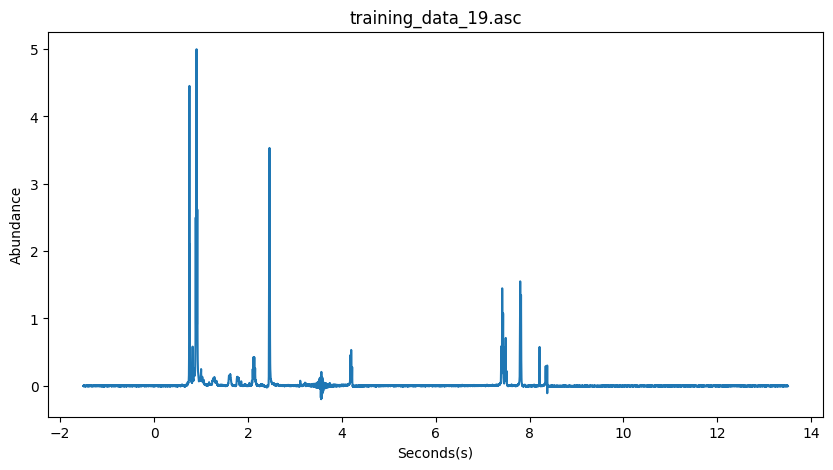

           X      Real  Imaginary
0  12.506402 -0.002230   0.022945
1  12.505256 -0.002197   0.022865
2  12.504111 -0.002353   0.022734
3  12.502965 -0.002308   0.022800
4  12.501820 -0.002347   0.022974

Loaded training_data_2.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.25064015e+01 -2.23000022e-03  2.29452755e-02]
 [ 1.25052561e+01 -2.19730596e-03  2.28646515e-02]
 [ 1.25041106e+01 -2.35276647e-03  2.27336545e-02]
 [ 1.25029651e+01 -2.30820728e-03  2.28001369e-02]
 [ 1.25018196e+01 -2.34682135e-03  2.29739372e-02]]
  Min/Max: -2.89282038134269 12.50640154627999


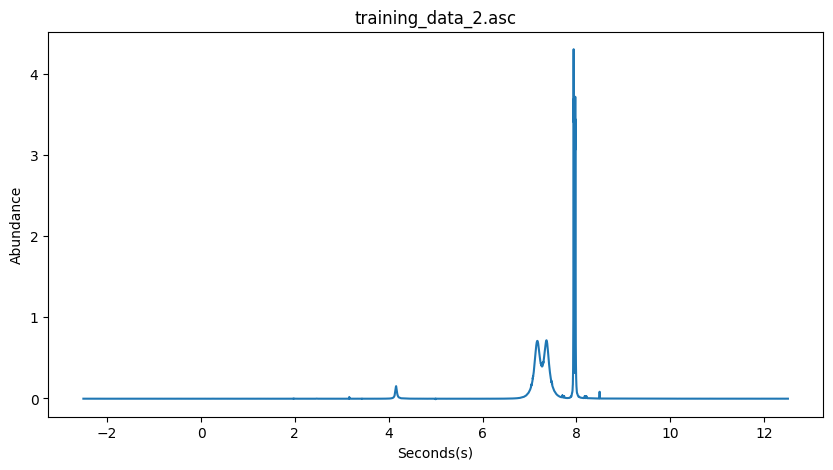

           X      Real  Imaginary
0  13.506402 -0.002691   0.012087
1  13.505256 -0.002356   0.012250
2  13.504111 -0.002291   0.011903
3  13.502965 -0.002520   0.012194
4  13.501820 -0.002577   0.012065

Loaded training_data_20.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -2.69140633e-03  1.20868408e-02]
 [ 1.35052561e+01 -2.35553959e-03  1.22501974e-02]
 [ 1.35041106e+01 -2.29068594e-03  1.19027608e-02]
 [ 1.35029651e+01 -2.52010303e-03  1.21944476e-02]
 [ 1.35018196e+01 -2.57741697e-03  1.20650118e-02]]
  Min/Max: -7.8244947550059 15.49203920495349


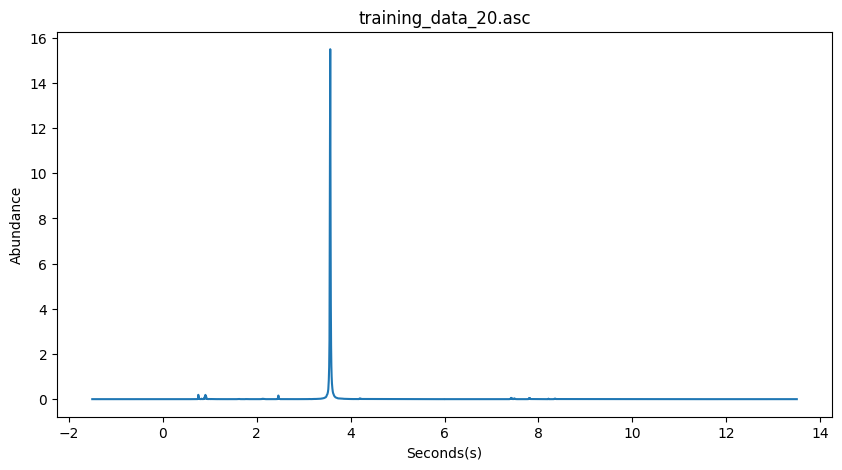

           X      Real  Imaginary
0  13.506402 -0.002403   0.012000
1  13.505256 -0.002429   0.011980
2  13.504111 -0.002306   0.011980
3  13.502965 -0.002432   0.011994
4  13.501820 -0.002410   0.011845

Loaded training_data_21.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.35064015e+01 -2.40346928e-03  1.19998952e-02]
 [ 1.35052561e+01 -2.42942678e-03  1.19801530e-02]
 [ 1.35041106e+01 -2.30561338e-03  1.19803499e-02]
 [ 1.35029651e+01 -2.43213343e-03  1.19935448e-02]
 [ 1.35018196e+01 -2.41005246e-03  1.18452185e-02]]
  Min/Max: -7.83593317954689 15.45534248647161


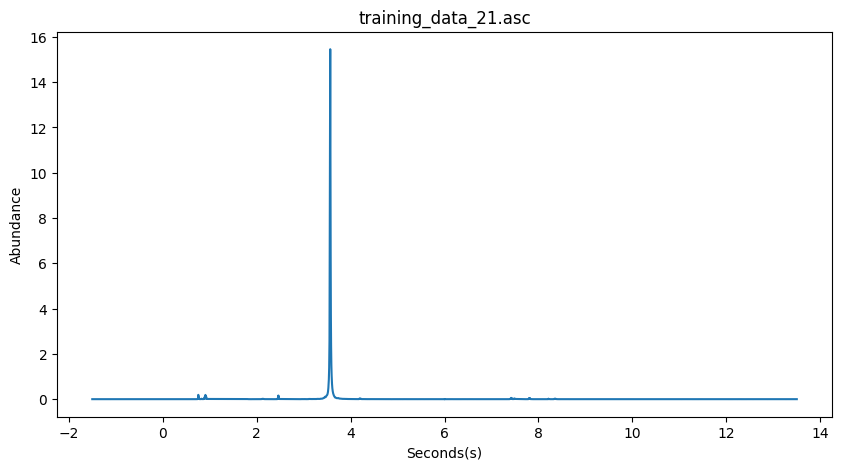

           X      Real  Imaginary
0  12.000799 -0.002179   0.011771
1  11.999883 -0.002131   0.011710
2  11.998967 -0.002054   0.011692
3  11.998052 -0.002274   0.011682
4  11.997136 -0.002184   0.011819

Loaded training_data_22.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.20007989e+01 -2.17932541e-03  1.17706739e-02]
 [ 1.19998832e+01 -2.13071870e-03  1.17099961e-02]
 [ 1.19989675e+01 -2.05432555e-03  1.16915787e-02]
 [ 1.19980517e+01 -2.27350666e-03  1.16816450e-02]
 [ 1.19971360e+01 -2.18418087e-03  1.18191461e-02]]
  Min/Max: -7.2309059523943 14.37602455182498


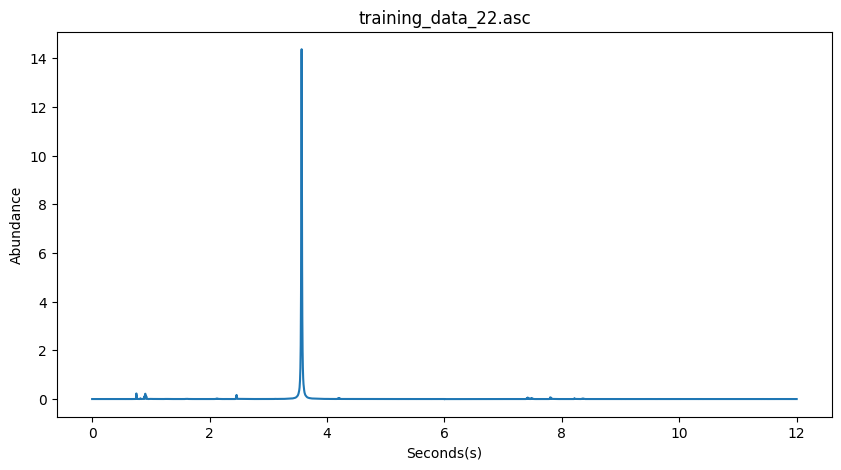

           X      Real  Imaginary
0  12.000799  0.000152  -0.000363
1  11.999883  0.000130  -0.000433
2  11.998967  0.000054  -0.000541
3  11.998052 -0.000164  -0.000409
4  11.997136 -0.000025  -0.000295

Loaded training_data_23.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.20007989e+01  1.51617027e-04 -3.62930390e-04]
 [ 1.19998832e+01  1.30073154e-04 -4.32869878e-04]
 [ 1.19989675e+01  5.43283585e-05 -5.40875643e-04]
 [ 1.19980517e+01 -1.64467690e-04 -4.08644394e-04]
 [ 1.19971360e+01 -2.48751039e-05 -2.94573504e-04]]
  Min/Max: -0.18834152528913 12.00079893287066


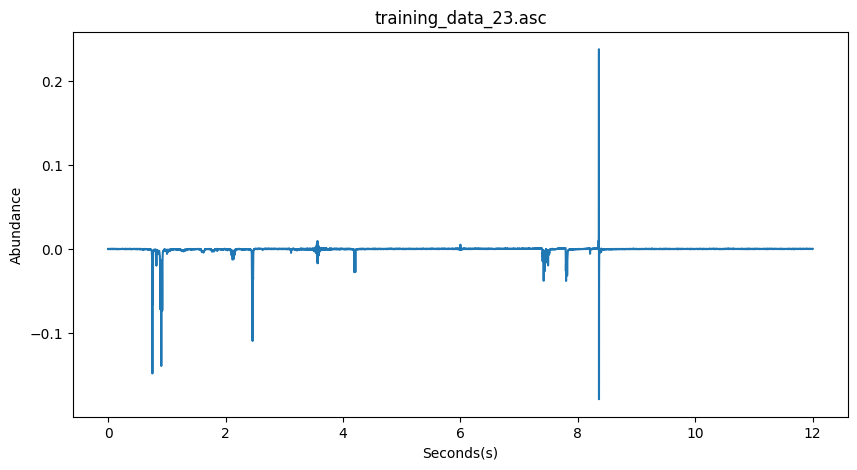

            X      Real  Imaginary
0  224.969753 -0.001953   0.001595
1  224.960219 -0.000574   0.002760
2  224.950684  0.001384   0.002043
3  224.941150  0.002182   0.000213
4  224.931615  0.001435  -0.001401

Loaded training_data_24.asc
  Shape: (26214, 3)
  Dtype: float64
  First 5 rows:
 [[ 2.24969753e+02 -1.95268629e-03  1.59454553e-03]
 [ 2.24960219e+02 -5.74337117e-04  2.76003739e-03]
 [ 2.24950684e+02  1.38431668e-03  2.04313008e-03]
 [ 2.24941150e+02  2.18210552e-03  2.13251835e-04]
 [ 2.24931615e+02  1.43541063e-03 -1.40134883e-03]]
  Min/Max: -24.96021891860832 224.96975349963364


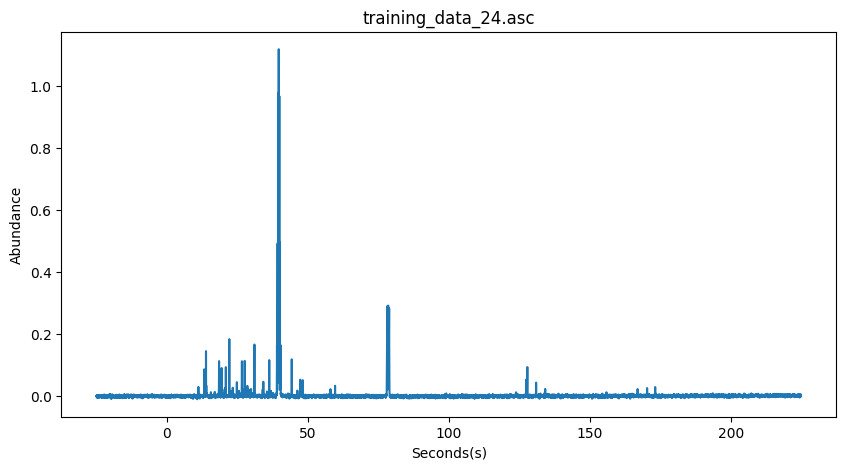

           X      Real  Imaginary
0  12.506402  0.000627  -0.011981
1  12.505256  0.000026  -0.010666
2  12.504111 -0.000042  -0.009897
3  12.502965  0.000212  -0.009041
4  12.501820  0.000067  -0.008397

Loaded training_data_25.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.25064015e+01  6.26902449e-04 -1.19810275e-02]
 [ 1.25052561e+01  2.57359169e-05 -1.06658208e-02]
 [ 1.25041106e+01 -4.21402686e-05 -9.89680801e-03]
 [ 1.25029651e+01  2.11893400e-04 -9.04102201e-03]
 [ 1.25018196e+01  6.69038345e-05 -8.39660726e-03]]
  Min/Max: -2.50640154627999 12.50640154627999


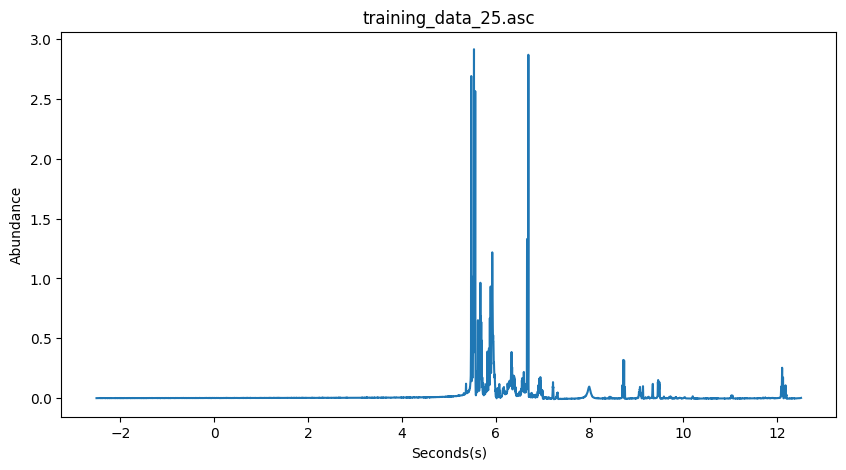

           X      Real  Imaginary
0  12.506402 -0.002584   0.011111
1  12.505256 -0.002734   0.010676
2  12.504111 -0.002653   0.011036
3  12.502965 -0.002825   0.011031
4  12.501820 -0.002736   0.011045

Loaded training_data_26.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.25064015e+01 -2.58377057e-03  1.11107626e-02]
 [ 1.25052561e+01 -2.73425525e-03  1.06758056e-02]
 [ 1.25041106e+01 -2.65278730e-03  1.10362399e-02]
 [ 1.25029651e+01 -2.82545277e-03  1.10313683e-02]
 [ 1.25018196e+01 -2.73589501e-03  1.10449375e-02]]
  Min/Max: -2.50640154627999 12.50640154627999


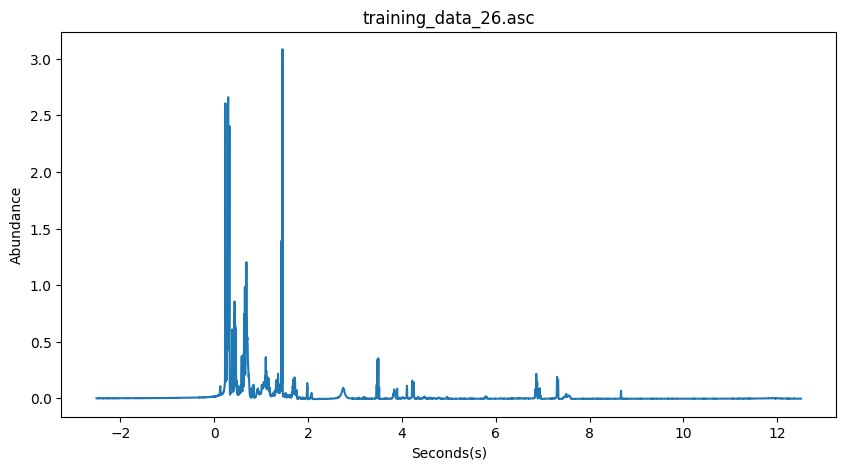

           X      Real  Imaginary
0  12.506402 -0.002316   0.022564
1  12.505256 -0.002403   0.022722
2  12.504111 -0.002401   0.022694
3  12.502965 -0.002420   0.022770
4  12.501820 -0.002434   0.022735

Loaded training_data_3.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.25064015e+01 -2.31569078e-03  2.25638221e-02]
 [ 1.25052561e+01 -2.40299675e-03  2.27217418e-02]
 [ 1.25041106e+01 -2.40109644e-03  2.26942028e-02]
 [ 1.25029651e+01 -2.41951938e-03  2.27698477e-02]
 [ 1.25018196e+01 -2.43408206e-03  2.27346870e-02]]
  Min/Max: -2.90530626191976 12.50640154627999


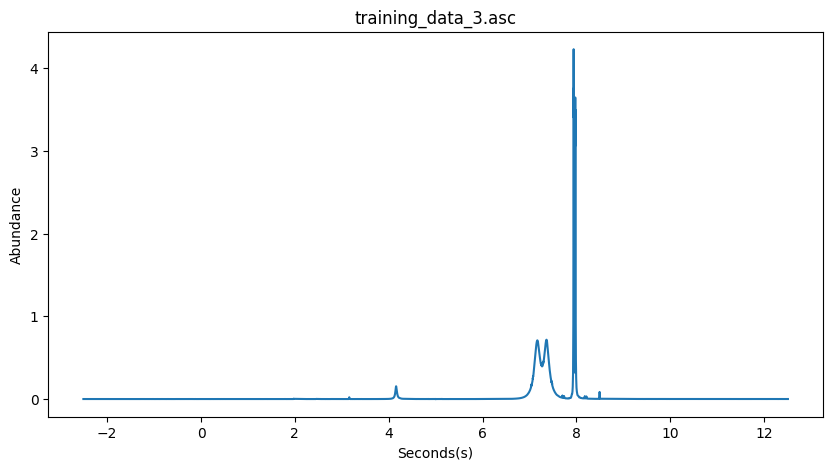

           X      Real  Imaginary
0  12.506402 -0.002310   0.022812
1  12.505256 -0.002146   0.022821
2  12.504111 -0.002311   0.022859
3  12.502965 -0.002306   0.022778
4  12.501820 -0.002339   0.022750

Loaded training_data_4.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.25064015e+01 -2.30983415e-03  2.28115390e-02]
 [ 1.25052561e+01 -2.14634286e-03  2.28205993e-02]
 [ 1.25041106e+01 -2.31054286e-03  2.28593808e-02]
 [ 1.25029651e+01 -2.30642232e-03  2.27777575e-02]
 [ 1.25018196e+01 -2.33899874e-03  2.27498681e-02]]
  Min/Max: -2.83404197582763 12.50640154627999


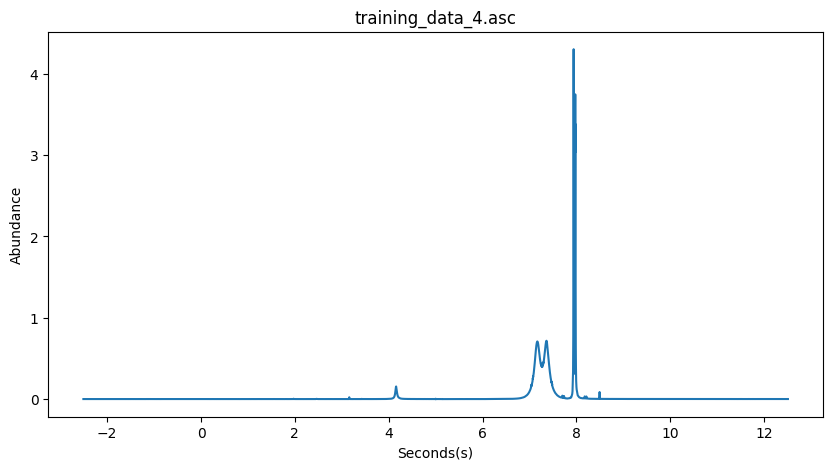

           X      Real  Imaginary
0  12.506402 -0.001725   0.012626
1  12.505256 -0.002030   0.012750
2  12.504111 -0.001900   0.012733
3  12.502965 -0.001976   0.012741
4  12.501820 -0.002023   0.012611

Loaded training_data_5.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 1.25064015e+01 -1.72537022e-03  1.26257352e-02]
 [ 1.25052561e+01 -2.02988786e-03  1.27504037e-02]
 [ 1.25041106e+01 -1.90000891e-03  1.27331825e-02]
 [ 1.25029651e+01 -1.97633637e-03  1.27412891e-02]
 [ 1.25018196e+01 -2.02337009e-03  1.26110754e-02]]
  Min/Max: -9.53283196505859 22.0872748962324


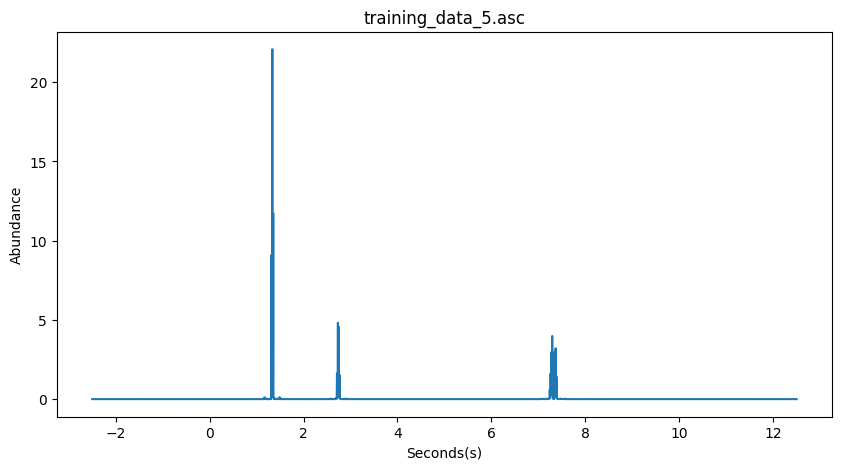

            X      Real  Imaginary
0  224.969753  0.001946   0.003016
1  224.960219  0.001660   0.004946
2  224.950684  0.004758   0.006170
3  224.941150  0.004332   0.003408
4  224.931615  0.004907   0.003769

Loaded training_data_6.asc
  Shape: (26214, 3)
  Dtype: float64
  First 5 rows:
 [[2.24969753e+02 1.94645982e-03 3.01618965e-03]
 [2.24960219e+02 1.65984946e-03 4.94587047e-03]
 [2.24950684e+02 4.75805646e-03 6.16997056e-03]
 [2.24941150e+02 4.33157717e-03 3.40778734e-03]
 [2.24931615e+02 4.90656918e-03 3.76911101e-03]]
  Min/Max: -24.96021891860832 224.96975349963364


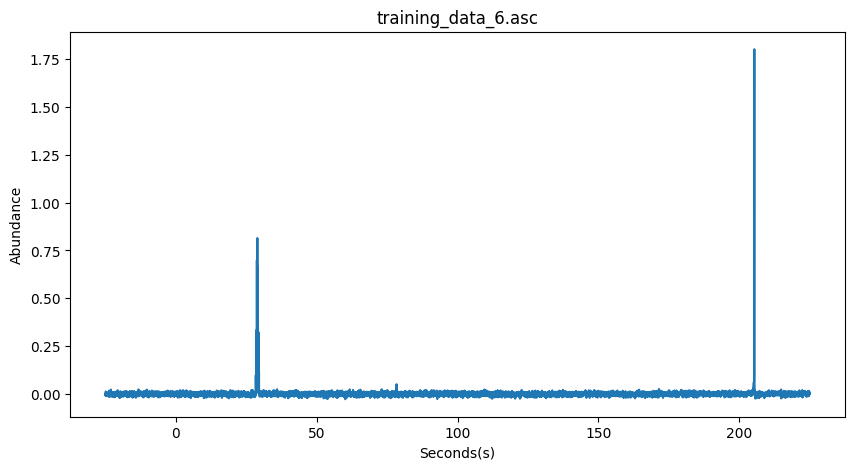

          X      Real  Imaginary
0  8.000949 -0.000241   0.098417
1  8.000377 -0.000457   0.098669
2  7.999804 -0.000343   0.098977
3  7.999232 -0.000384   0.099485
4  7.998660  0.000117   0.100251

Loaded training_data_7.asc
  Shape: (13107, 3)
  Dtype: float64
  First 5 rows:
 [[ 8.00094930e+00 -2.40743020e-04  9.84168767e-02]
 [ 8.00037690e+00 -4.57367851e-04  9.86685107e-02]
 [ 7.99980450e+00 -3.43133079e-04  9.89766242e-02]
 [ 7.99923210e+00 -3.83577810e-04  9.94853706e-02]
 [ 7.99865970e+00  1.16993268e-04  1.00251479e-01]]
  Min/Max: -1.65317323835783 8.00094930297014


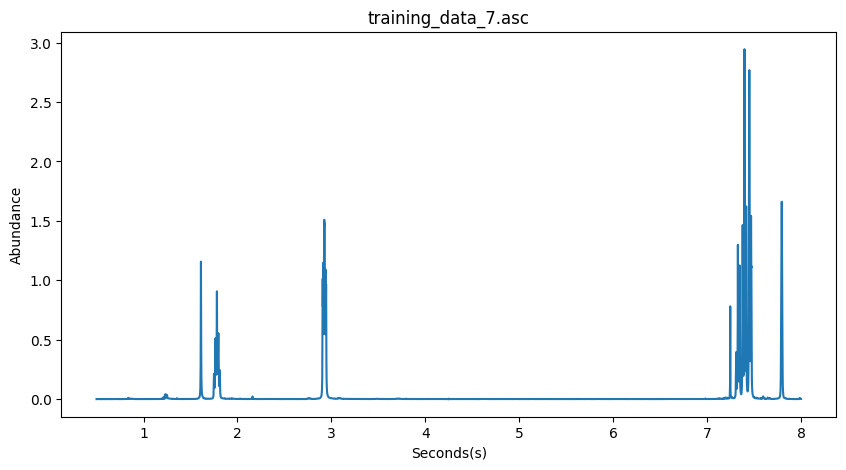

            X      Real  Imaginary
0  224.969753 -0.001758  -0.004106
1  224.960219 -0.002427  -0.002556
2  224.950684 -0.000940  -0.001656
3  224.941150 -0.000284  -0.002771
4  224.931615 -0.000422  -0.003484

Loaded training_data_8.asc
  Shape: (26214, 3)
  Dtype: float64
  First 5 rows:
 [[ 2.24969753e+02 -1.75840097e-03 -4.10595460e-03]
 [ 2.24960219e+02 -2.42656395e-03 -2.55553881e-03]
 [ 2.24950684e+02 -9.39954211e-04 -1.65551148e-03]
 [ 2.24941150e+02 -2.83692155e-04 -2.77111423e-03]
 [ 2.24931615e+02 -4.21629629e-04 -3.48381639e-03]]
  Min/Max: -24.96021891860832 224.96975349963364


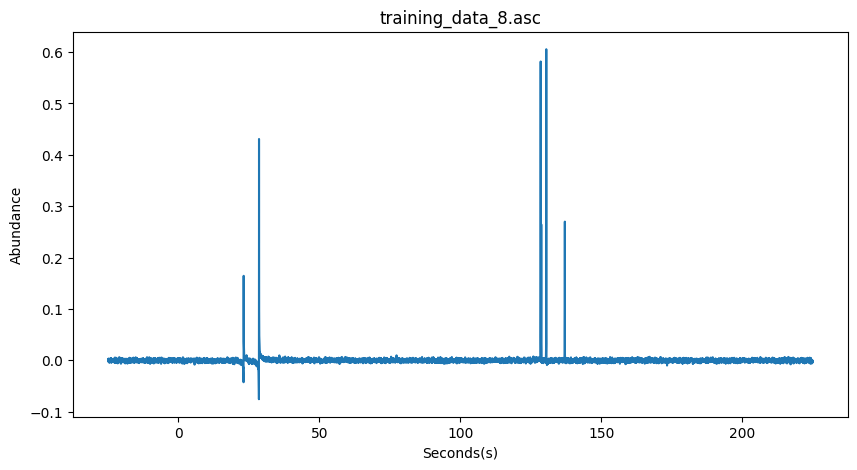

            X      Real  Imaginary
0  224.969753  0.000147  -0.000152
1  224.960219 -0.000388  -0.000224
2  224.950684 -0.000416   0.000279
3  224.941150 -0.000129   0.000181
4  224.931615 -0.000417   0.000445

Loaded training_data_9.asc
  Shape: (26214, 3)
  Dtype: float64
  First 5 rows:
 [[ 2.24969753e+02  1.47073817e-04 -1.51927980e-04]
 [ 2.24960219e+02 -3.87995336e-04 -2.24315734e-04]
 [ 2.24950684e+02 -4.15537969e-04  2.78537527e-04]
 [ 2.24941150e+02 -1.28687859e-04  1.80768016e-04]
 [ 2.24931615e+02 -4.16547580e-04  4.44900765e-04]]
  Min/Max: -24.96021891860832 224.96975349963364


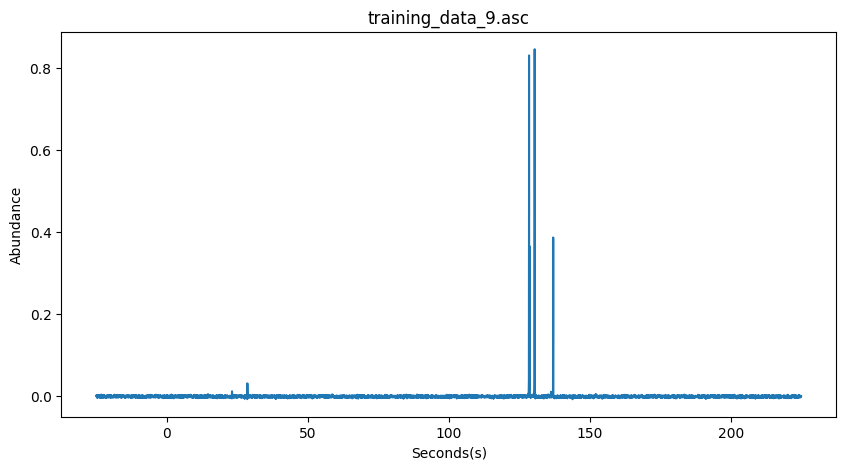

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from importlib import reload
from functions import nmr_function as nmr

reload(nmr)

# Folder you referenced
folder = Path("data/training_data")

# List all ASC files
asc_files = [f for f in folder.glob("*.asc")]
print("Found ASC files:", len(asc_files))
for f in asc_files:
    print(" -", f.name)

def safe_load(path):
    """Mimic your previous workflow but add debugging."""
    try:
        df, name = nmr.load_fid_and_preview(str(path))
    except Exception as e:
        print(f"❌ Could not load {path.name}: {e}")
        return None, None

    # Convert to numpy
    arr = df if isinstance(df, np.ndarray) else df.to_numpy()

    print(f"\nLoaded {path.name}")
    print("  Shape:", arr.shape)
    print("  Dtype:", arr.dtype)
    print("  First 5 rows:\n", arr[:5])
    print("  Min/Max:", arr.min(), arr.max())

    return arr, path.name

# Iterate & plot each raw FID
for file in asc_files:
    arr, name = safe_load(file)
    if arr is None:
        continue

    # Plot raw FID mirror of your working code
    try:
        nmr.plot_fid(
            arr,
            title=name,
            xcol=0,
            ycol=1,
            xlabel="Seconds(s)",
            ylabel="Abundance",
            invert_x=False
        )
    except Exception as e:
        print(f"❌ Plot error for {name}: {e}")
